In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn import metrics, naive_bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
df = pd.read_excel("/content/Fianal-Exam-Set3.xlsx")

In [ ]:
df.head(5)

Y     X1     X2     X3     X4     X5     X6     X7     X8     X9  ...  \
0  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  61.94  61.81  ...   
1  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  61.94  ...   
2  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  62.25  ...   
3  63.10  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  61.40  ...   
4  62.99  63.10  62.76  62.87  62.02  61.78  61.04  61.66  61.70  62.12  ...   

     X21    X22    X23    X24    X25    X26    X27    X28    X29    X30  
0  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  62.46  62.58  
1  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  62.46  
2  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  62.10  
3  64.00  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  63.08  
4  65.70  64.00  63.76  64.05  63.40  63.89  63.58  64.61  63.98  64.40  

[5 rows x 31 columns]

# **Data Understanding**

# **Preprocessing**

In [ ]:
import pandas as pd

# Load your data into DataFrame 'df'
# df = pd.read_csv('your_data.csv')  # Example if you're reading from a CSV file

# Check NaN counts before dropping
nan_counts = df.isna().sum()
print("NaN counts by column before dropping rows:")
print(nan_counts)

NaN counts by column before dropping rows:
Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
dtype: int64


In [ ]:
# Display rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaN values:")
print(nan_rows)


Rows with NaN values:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
Index: []

[0 rows x 31 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1229 non-null   float64
 1   X1      1229 non-null   float64
 2   X2      1229 non-null   float64
 3   X3      1229 non-null   float64
 4   X4      1229 non-null   float64
 5   X5      1229 non-null   float64
 6   X6      1229 non-null   float64
 7   X7      1229 non-null   float64
 8   X8      1229 non-null   float64
 9   X9      1229 non-null   float64
 10  X10     1229 non-null   float64
 11  X11     1229 non-null   float64
 12  X12     1229 non-null   float64
 13  X13     1229 non-null   float64
 14  X14     1229 non-null   float64
 15  X15     1229 non-null   float64
 16  X16     1229 non-null   float64
 17  X17     1229 non-null   float64
 18  X18     1229 non-null   float64
 19  X19     1229 non-null   float64
 20  X20     1229 non-null   float64
 21  X21     1229 non-null   float64
 22  

In [ ]:
df.dropna(inplace=True)

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
Index: []

[0 rows x 31 columns]


# **Partitioning**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split



# # Split the data into training (80%) and testing (20%)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # random_state for reproducibility

# # Export train and test dataframes to Excel files
# train_df.to_excel('/content/TrainingData3.xlsx', index=False)
# test_df.to_excel('/content/TestingData3.xlsx', index=False)

# "Training and testing data have been exported to Excel files successfully."



'Training and testing data have been exported to Excel files successfully.'

In [ ]:
train_df = pd.read_excel("/content/TrainingData3.xlsx")
test_df = pd.read_excel("/content/TestingData3.xlsx")
X_train = train_df.drop(columns=['Y']).values  # Features train
y_train = train_df['Y'].values  # Target train

X_test = test_df.drop(columns=['Y']).values  # Features test
y_test = test_df['Y'].values  # Target test

# train_df now contains 80% of the original DataFrame, randomly sampled
# test_df now contains the remaining 20% of the original DataFrame
print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)
print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_test: {X_test.shape}")

Training DataFrame shape: (983, 31)
Testing DataFrame shape: (246, 31)
Shape of partitions:
 X_train: (983, 30), 
 X_test: (246, 30)


In [ ]:
df.shape

(1229, 31)

# **Statistical Model**

# **Train linear regression model:**

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:0.4658697729251742

Estiamted coefficients:[ 6.94174189e-01  1.79724508e-01  4.31945182e-02  3.98989702e-02
  1.89830751e-02 -5.36173487e-03 -1.21644652e-02  2.70335052e-03
  3.62245994e-02 -5.65311557e-02  2.62056403e-02  5.62515541e-02
  7.29996152e-02 -4.49928579e-02 -2.28521922e-03 -1.20967388e-02
 -2.77147705e-02 -1.36407494e-02 -1.12213412e-02  2.16036301e-02
 -3.50800532e-02  7.24726603e-02 -3.61021478e-02 -1.05215586e-04
 -2.67268402e-02 -2.58123844e-03  3.05725813e-02 -1.77690149e-02
  1.19199187e-01 -1.16122144e-01]


Linear Regression Equation:  ŷ =β0+β1X1+...+βkXk



# **Test the prediction performance:**

In [ ]:
import numpy as np
from sklearn import metrics

y_pred_LG = linear_reg.predict(X_test)

# Root Mean Squared Error (RMSE)
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LG))
print(f"RMSE_LG: {RMSE_sk}")

# Mean Absolute Deviation (MAD)
MAD_sk = np.mean(np.abs(y_test - y_pred_LG))
print(f"MAD_LG: {MAD_sk}")

MAE_sk = metrics.mean_absolute_error(y_test, y_pred_LG)
print(f"MAE_LG: {MAE_sk}")

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred_LG):
    return np.mean(np.abs((y_true - y_pred_LG) / y_true)) * 100
MAPE_sk = mean_absolute_percentage_error(y_test, y_pred_LG)
print(f"MAPE_LG: {MAPE_sk}")


RMSE_LG: 2.138323661779407
MAD_LG: 1.506137574967027
MAE_LG: 1.506137574967027
MAPE_LG: 2.3933848281186894


# **Statistical Analysis of Linear Regression**

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add a column of ones to an array to estimate the intercept.
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1634.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:07:39   Log-Likelihood:                -2419.5
No. Observations:                 983   AIC:                             4901.
Df Residuals:                     952   BIC:                             5053.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4659      0.333      1.398      0.1

Random search

RMSE: 2.138323661779407
MAE: 1.506137574967027
MAD: 1.506137574967027
MAPE: 2.3933848281186894%
Best Parameters: {'fit_intercept': True}


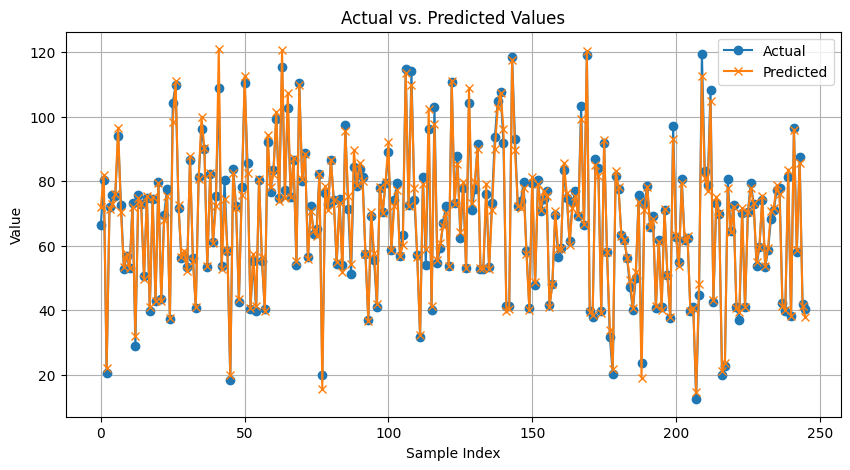

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False]
}

# Define the Randomized Search
random_search = RandomizedSearchCV(
    linear_reg,
    param_distributions=param_grid,
    n_iter=min(10, len(param_grid['fit_intercept'])),  # Ensure n_iter does not exceed grid size
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Check if the number of features in X_test matches the expectation
if X_test.shape[1] != X_train.shape[1]:
    raise ValueError(f"X_test has {X_test.shape[1]} features, expected {X_train.shape[1]}")

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}%')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS3.xlsx', index=False)



Best LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 2.138323661779407
MAE: 1.506137574967027
MAD: 1.506137574967027
MAPE: 2.3933848281186894
Best Parameters: {'fit_intercept': True}
Coefficients: [ 6.94174189e-01  1.79724508e-01  4.31945182e-02  3.98989702e-02
  1.89830751e-02 -5.36173487e-03 -1.21644652e-02  2.70335052e-03
  3.62245994e-02 -5.65311557e-02  2.62056403e-02  5.62515541e-02
  7.29996152e-02 -4.49928579e-02 -2.28521922e-03 -1.20967388e-02
 -2.77147705e-02 -1.36407494e-02 -1.12213412e-02  2.16036301e-02
 -3.50800532e-02  7.24726603e-02 -3.61021478e-02 -1.05215586e-04
 -2.67268402e-02 -2.58123844e-03  3.05725813e-02 -1.77690149e-02
  1.19199187e-01 -1.16122144e-01]
Intercept: 0.4658697729251742


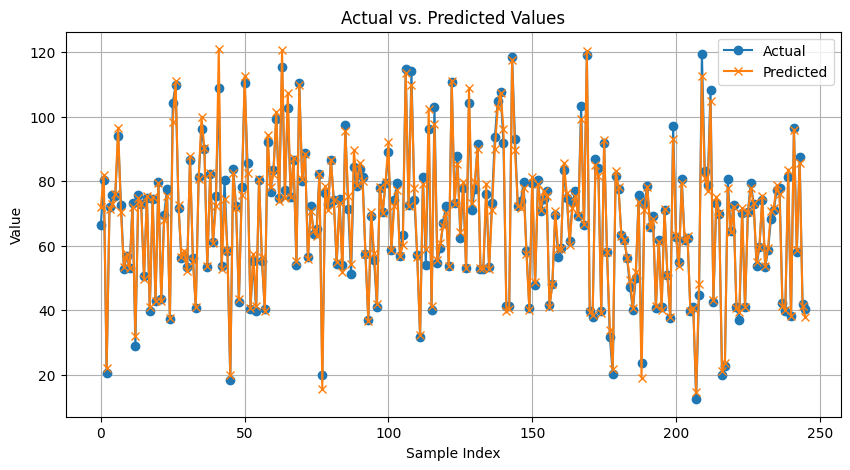

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined in your environment

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Print the coefficients of the best estimator
print("Coefficients:", best_estimator.coef_)

# If fit_intercept is True, also print the intercept
if best_estimator.fit_intercept:
    print("Intercept:", best_estimator.intercept_)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS3.xlsx', index=False)


# **Polynomial Regression**

Degree 1:
X_poly_train shape: (983, 31)
X_poly_test shape: (246, 31)
Degree 2:
X_poly_train shape: (983, 496)
X_poly_test shape: (246, 496)
Degree 3:
X_poly_train shape: (983, 5456)
X_poly_test shape: (246, 5456)
Degree 4:
X_poly_train shape: (983, 46376)
X_poly_test shape: (246, 46376)
Degree 5:
X_poly_train shape: (983, 324632)
X_poly_test shape: (246, 324632)
Best Polynomial degree: 1


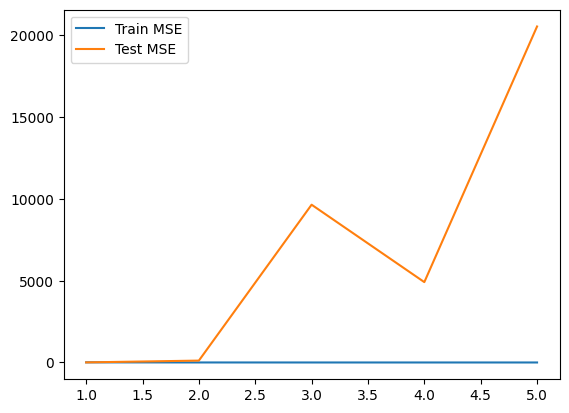

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_MSE = []
test_MSE = []

# Test lower degrees first
max_degree = 5  # Limit the maximum degree to avoid high memory usage
for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    print(f"Degree {degree}:")
    print("X_poly_train shape:", X_poly_train.shape)
    print("X_poly_test shape:", X_poly_test.shape)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    y_test_pred_LP = lin_reg.predict(X_poly_test)

    train_error = mean_squared_error(y_train, y_train_pred_LP)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    train_MSE.append(train_error)
    test_MSE.append(test_error)

print(f'Best Polynomial degree: {test_MSE.index(min(test_MSE)) + 1}')
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.legend()
plt.show()


# **with PCA**

Best Polynomial degree: 3


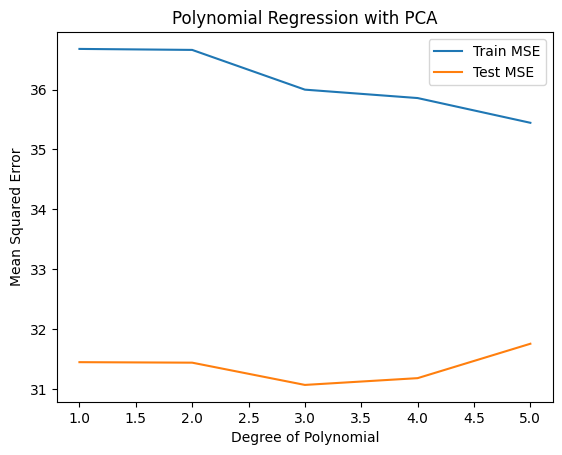

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Adjust this to your needs

# Apply PCA to the scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Store the train and test MSE for different polynomial degrees
train_MSE = []
test_MSE = []

# Define the maximum degree for polynomial features
max_degree = 5

# Loop over degrees to evaluate the model
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train_pca)
    X_poly_test = poly_features.transform(X_test_pca)

    # Fit a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Predict and evaluate on the training set
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    train_error = mean_squared_error(y_train, y_train_pred_LP)
    train_MSE.append(train_error)

    # Predict and evaluate on the test set
    y_test_pred_LP = lin_reg.predict(X_poly_test)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    test_MSE.append(test_error)

# Output the best degree based on test MSE
best_degree_index = test_MSE.index(min(test_MSE))
best_degree = range(1, max_degree + 1)[best_degree_index]
print(f'Best Polynomial degree: {best_degree}')

# Plot the train and test MSE
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression with PCA')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_LP))

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_LP)

# Calculate MAD (Median Absolute Deviation)
mad = median_absolute_error(y_test, y_test_pred_LP)

# Calculate MAPE - Note: y_test must not contain any zero values for this calculation
mape = np.mean(np.abs((y_test - y_test_pred_LP) / y_test)) * 100

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 5.6350927689064205
MAE: 4.242820050727661
MAD: 3.0976611626082224
MAPE: 7.811120466539413 %


Random search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint
import matplotlib.pyplot as plt

# Define a pipeline for scaling, PCA, and linear regression with polynomial features
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'pca__n_components': randint(1, X_train.shape[1]),  # Assuming X_train has been defined
    'poly__degree': randint(1, 6),  # Polynomial degree from 1 to 5
}

# Create a scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds in cross-validation
    scoring=mse_scorer,
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Make predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE for the predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output RMSE
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'pca__n_components': 12, 'poly__degree': 1}
Train RMSE: 2.916293319564254
Test RMSE: 2.197753060782312


Best Polynomial

Test RMSE: 2.1948720262327095
Test MAE: 1.5722997112525836
Test MAD: 1.1314210188877176
Test MAPE: 2.4252279470909945%


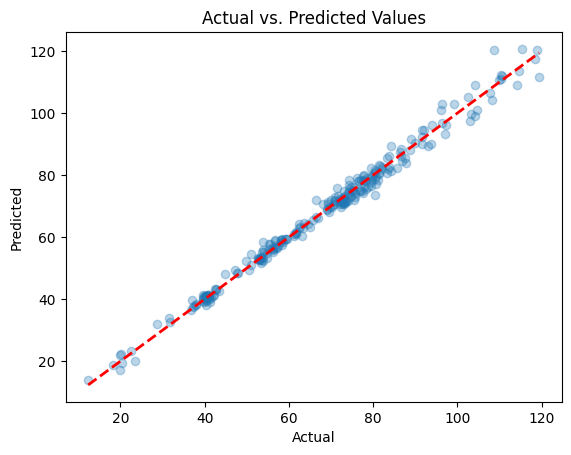

Results saved to Excel file: /content/Polynomial_regression_Results_DS3.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df is your DataFrame and it has been preprocessed appropriately
# X = df.drop(columns=['Y']).values
# y = df['Y'].values

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the number of components found to be best
pca = PCA(n_components=12)  # Best parameter from random search
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create polynomial features with the degree found to be best
poly_features = PolynomialFeatures(degree=1, include_bias=True)  # Best parameter from random search
X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict and evaluate on the test set
y_test_pred = lin_reg.predict(X_test_poly)

# Calculate evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mad = median_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAD: {test_mad}")
print(f"Test MAPE: {test_mape}%")

# Plot the actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Polynomial_regression_Results_DS3.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")



# **Gaussian Processes**

RMSE: 7.768
MAE: 3.373
MAD: 1.498
MAPE: 6.006%


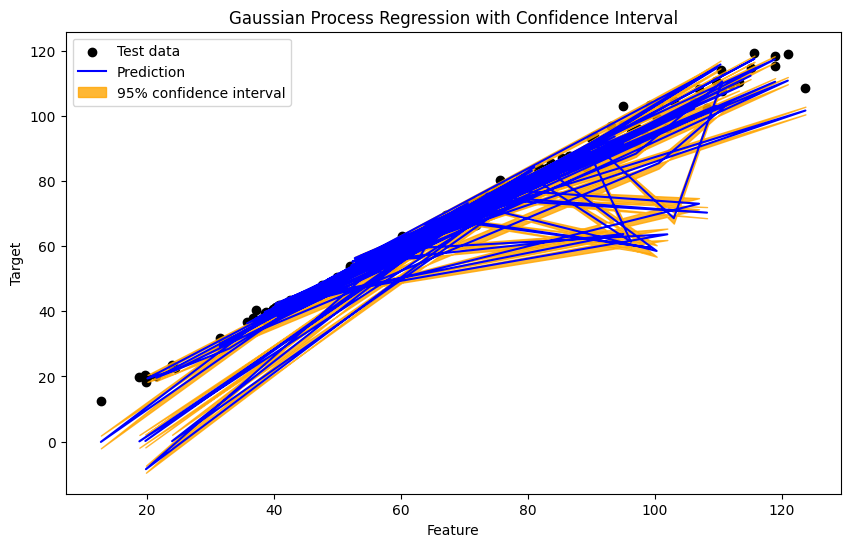

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Set up the kernel and Gaussian Process Regressor
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model
gp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB, sigma = gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse_GB = np.sqrt(mean_squared_error(y_test, y_pred_GB))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mad_GB = median_absolute_error(y_test, y_pred_GB)
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)

# Print the evaluation metrics
print(f'RMSE: {rmse_GB:.3f}')
print(f'MAE: {mae_GB:.3f}')
print(f'MAD: {mad_GB:.3f}')
print(f'MAPE: {mape_GB:.3f}%')

# Adjusted visualization of the confidence interval for visibility
confidence_factor = 1.96 * np.maximum(sigma, 0.01)  # Ensure a minimum visibility threshold

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, c='k', label='Test data')
plt.plot(X_test[:, 0], y_pred_GB, 'b-', label='Prediction')

# Plot the confidence interval with a minimum threshold for visibility
plt.fill_between(X_test[:, 0],
                 y_pred_GB - confidence_factor,
                 y_pred_GB + confidence_factor,
                 color='orange', alpha=0.8, label="95% confidence interval")

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gaussian Process Regression with Confidence Interval')
plt.legend(loc='upper left')
plt.show()






Random search

Random search

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the kernel with default parameters to optimize
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Setup Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel)

# Parameter distribution for Randomized Search
param_dist = {
    'kernel__k1__constant_value': uniform(0.1, 10.0),
    'kernel__k2__length_scale': uniform(0.1, 10.0),
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best score (neg_mean_squared_error):", best_score)

# Now let's use the best parameters to create a GaussianProcessRegressor model
optimal_kernel = C(best_params['kernel__k1__constant_value']) * RBF(best_params['kernel__k2__length_scale'])
optimal_gp = GaussianProcessRegressor(kernel=optimal_kernel, n_restarts_optimizer=9)

# Fit the model with the best kernel
optimal_gp.fit(X_train, y_train)

# Predictions
y_pred, sigma = optimal_gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.2s
[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.0s
[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.7s
[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   1.0s
[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.0s
[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.2s
[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   1.8s
[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.8s
[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   1.4s
[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.9s
[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.7s
Best parameters found: {'kernel__k1__constant_value': 4.419450186421157, 'kernel__k2__length_scale': 3.0122914019804194}
Best score (neg_mean_squared_error): -32.501331465030404
Test RMSE: 71.015
Test MAE: 67.681


Best Gussian

Test RMSE: 6.357362128174969
Test MAE: 2.6212427037888353
Test MAD: 1.3587683200649465
Test MAPE: 7.339197086241124%


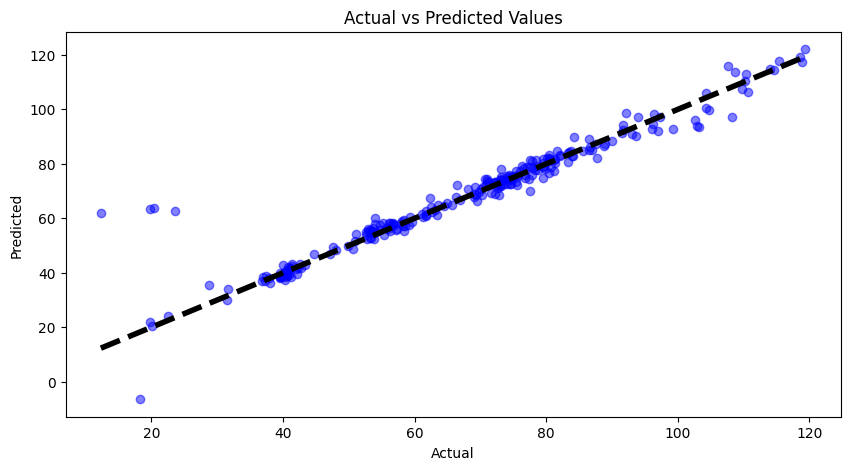

Results saved to Excel file: /content/Gaussian Process_Randomsearch_Results_DS3.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Adjust the bounds for the kernel parameters
constant_value = 4.419450186421157
length_scale = 3.0122914019804194
kernel = C(constant_value, (1e-3, 1e6)) * RBF(length_scale, (1e-6, 1e3))

# Initialize Gaussian Process Regressor with the best kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit the model
gp.fit(X_train, y_train.ravel())

# Make predictions
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()  # Fit and transform training data
gp.fit(X_train, y_train_scaled)  # Fit model with scaled target

y_test_pred, sigma = gp.predict(X_test, return_std=True)
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

results_df = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted': y_test_pred,
    'Lower CI': y_test_pred - 1.96 * sigma,
    'Upper CI': y_test_pred + 1.96 * sigma
})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Gaussian Process_Randomsearch_Results_DS3.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")

# **Time Series**

ACF and PACF

Seasonal component: For seasonality to be present, we would expect to see regular patterns or cycles in the seasonal component of the decomposition plot. Based on the images , the seasonal component seems to be very close to zero throughout the entire series, which suggests there is no significant seasonality in your data.

ACF and PACF plots: If the data had a strong seasonal component, we would expect to see spikes at the seasonal lags in the ACF and PACF plots. For instance, if there was monthly seasonality, you might see spikes at lags 12, 24, 36, and so on. However, in the plots you shared, there are no such recurring spikes, further suggesting a lack of seasonality in your data..

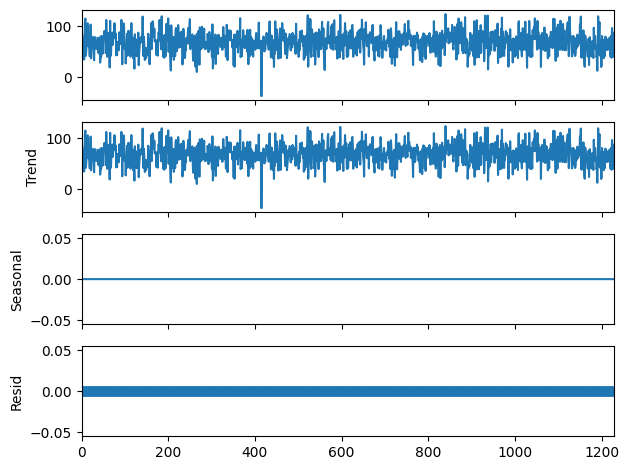

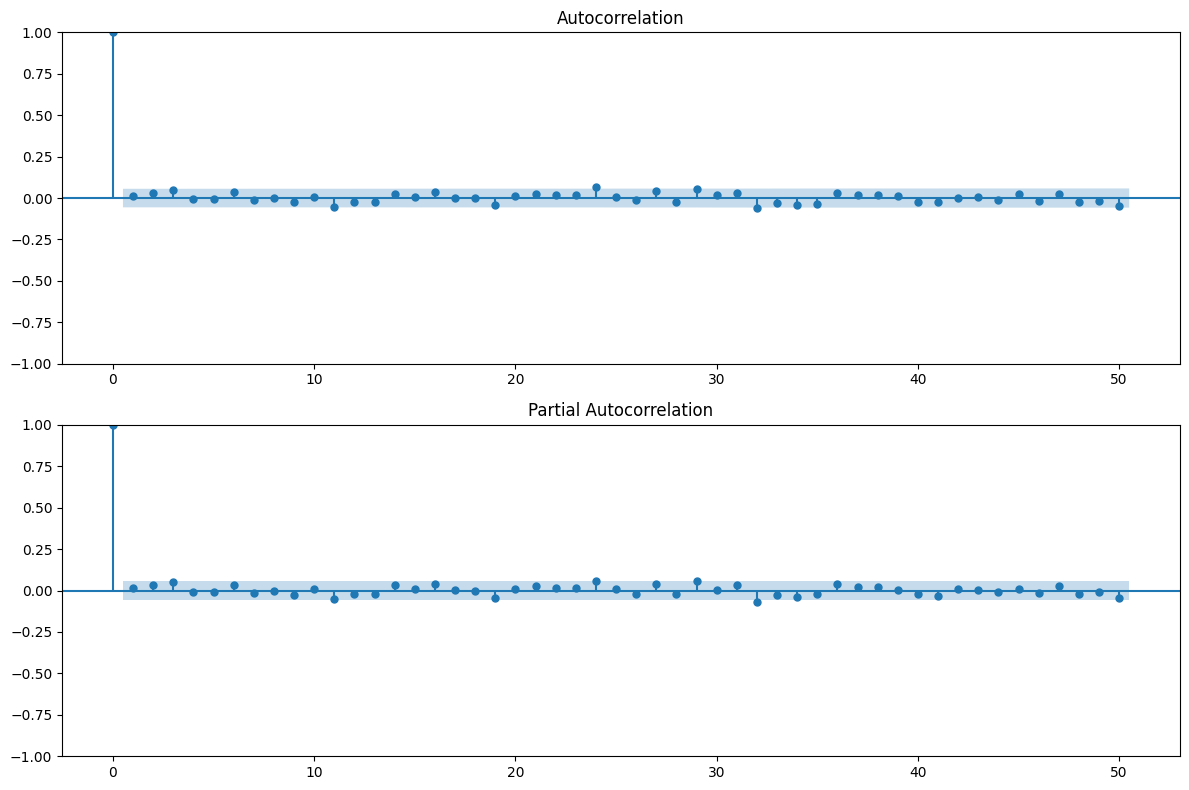

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = np.concatenate((y_train, y_test))

# Flatten the array to make it 1-dimensional
y = y.flatten()

# Convert to pandas Series (if not already in this format)
y_series = pd.Series(y)

# Decompose the combined time series
# Note: The period should be replaced with the expected seasonality period of your data (e.g., 12 for monthly data)
decomposition_result = seasonal_decompose(y_series, model='additive', period=1)  # Modify 'period' accordingly

# Plot the decomposed components of the time series
decomposition_result.plot()
plt.show()

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF
plot_acf(y_series, ax=ax1, lags=50)  # Modify the lags if necessary

# Plot the PACF
plot_pacf(y_series, ax=ax2, lags=50)  # Modify the lags if necessary

plt.tight_layout()
plt.show()

Movin Average

univariate

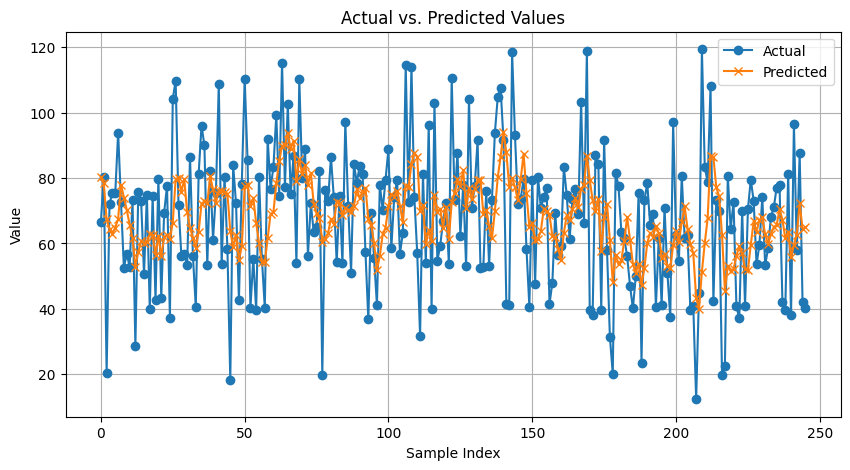

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Compute the moving average of the data with a specified window size."""
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""
    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]



# Let's assume y_train and y_test are defined
window_size = 5
y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the plot function to visualize the results
plot_predictions(y_test, y_pred_ma)

# Ensure y_train and y_test are correct
# Example: y_train = np.random.rand(100)
# Example: y_test = np.random.rand(20)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))  # Same as MAE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in percentage

    return rmse, mae, mad, mape

# Example usage
rmse, mae, mad, mape = calculate_metrics(y_test, y_pred_ma)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 19.318404022686238
MAE: 15.888813008130082
MAD: 15.888813008130082
MAPE: 29.902497082099906 %


Random search

Window Size 16, RMSE: 20.553
Window Size 13, RMSE: 20.310
Window Size 3, RMSE: 17.210
Window Size 13, RMSE: 20.310
Window Size 14, RMSE: 20.648
Window Size 17, RMSE: 20.542
Window Size 18, RMSE: 20.633
Window Size 19, RMSE: 20.665
Window Size 7, RMSE: 19.854
Window Size 2, RMSE: 15.081
Window Size 4, RMSE: 18.328
Window Size 5, RMSE: 19.318
Window Size 17, RMSE: 20.542
Window Size 15, RMSE: 20.651
Window Size 4, RMSE: 18.328
Window Size 15, RMSE: 20.651
Window Size 16, RMSE: 20.553
Window Size 8, RMSE: 20.002
Window Size 17, RMSE: 20.542
Window Size 13, RMSE: 20.310
Window Size 7, RMSE: 19.854
Window Size 15, RMSE: 20.651
Window Size 10, RMSE: 19.941
Window Size 2, RMSE: 15.081
Window Size 2, RMSE: 15.081
Window Size 14, RMSE: 20.648
Window Size 12, RMSE: 20.232
Window Size 13, RMSE: 20.310
Window Size 13, RMSE: 20.310
Window Size 3, RMSE: 17.210
Window Size 20, RMSE: 20.763
Window Size 9, RMSE: 19.986
Window Size 12, RMSE: 20.232
Window Size 17, RMSE: 20.542
Window Size 6, RMSE: 19.83

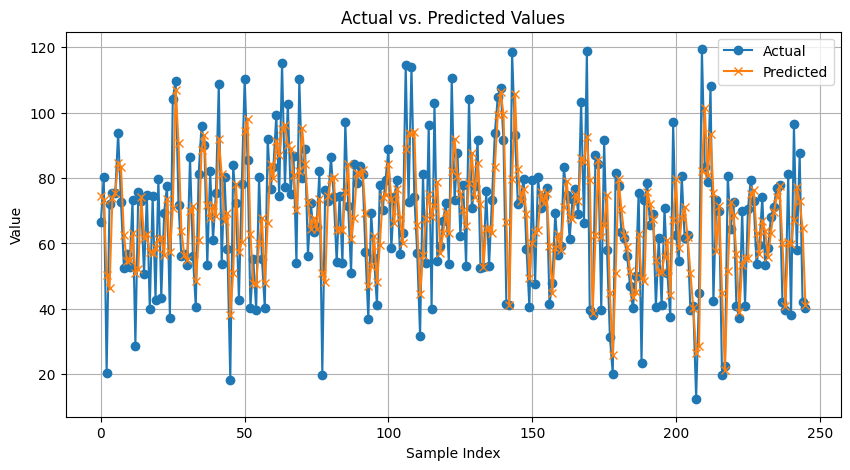

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train."""
    # Flatten the input arrays to ensure they are one-dimensional
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)

    # Combine train and test for the moving average calculation, then just take the last len(y_test) predictions
    full_series = np.concatenate([y_train_flat, y_test_flat])
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test_flat):]


# Assuming y_train and y_test are numpy arrays
# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Predict using the randomly chosen window size
    y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

    # Ensure prediction length matches y_test length for fair comparison
    y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))

    # Update best score and window size if the current RMSE is lower
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.3f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.3f}')

# Once the best window size is found, plot predictions with the best window size
y_pred_ma_best = predict_with_moving_average(y_train, y_test, best_window_size)
plot_predictions(y_test, y_pred_ma_best)


Best Moving Average

Best Window Size: 2
RMSE: 15.081
MAE: 12.204
MAD: 12.204
MAPE: 21.268%


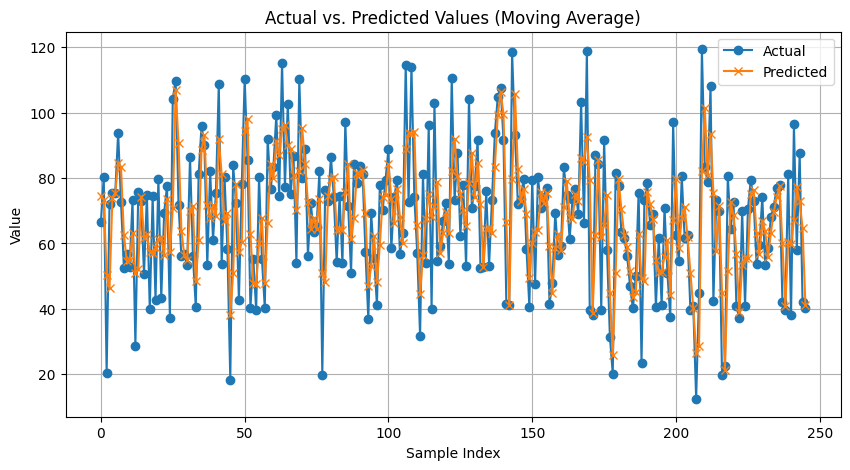

Results saved to Excel file: moving_average_uni_results_DS3.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""

    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]

# Assuming y_train and y_test are numpy arrays
best_window_size = 2  # From your random search results

# Predict using the best window size
y_pred_ma = predict_with_moving_average(y_train, y_test, best_window_size)

# Ensure prediction length matches y_test length for fair comparison
y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))
mae = mean_absolute_error(y_test_adjusted, y_pred_ma)
mad = np.mean(np.abs(y_test_adjusted - y_pred_ma))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test_adjusted - y_pred_ma) / y_test_adjusted)) * 100  # MAPE in percentage

print(f"Best Window Size: {best_window_size}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


plt.figure(figsize=(10, 5))
plt.plot(y_test_adjusted, label='Actual', marker='o')
plt.plot(y_pred_ma, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (Moving Average)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_uni_results_DS3.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


multivariate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Calculate moving averages for each feature
window_size = 5
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")




RMSE: 19.20
MAE: 15.78
MAD: 15.78
MAPE: 29.66%


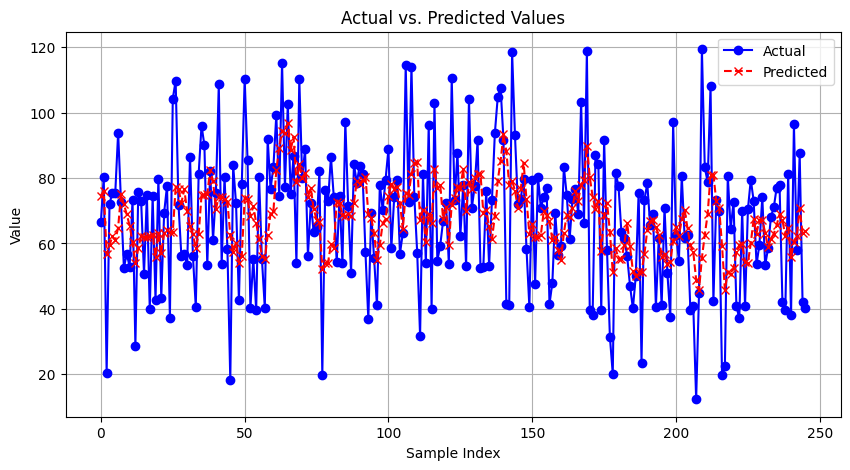

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assume y_test and y_pred are already defined from your model predictions
plot_predictions(y_test, y_pred)


Random search

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Calculate moving averages for each feature using the random window size
    for feature in feature_names:
        X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
        X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

    # Select only the moving average columns for modeling
    X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
    X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_MA, y_train)

    # Make predictions
    y_pred = model.predict(X_test_MA)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Update best score and window size
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.2f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.2f}')


Window Size 11, RMSE: 20.37
Window Size 16, RMSE: 20.87
Window Size 2, RMSE: 15.32
Window Size 8, RMSE: 19.98
Window Size 3, RMSE: 17.21
Window Size 20, RMSE: 21.83
Window Size 14, RMSE: 21.39
Window Size 11, RMSE: 20.37
Window Size 7, RMSE: 19.66
Window Size 8, RMSE: 19.98
Window Size 8, RMSE: 19.98
Window Size 13, RMSE: 21.39
Window Size 9, RMSE: 20.20
Window Size 11, RMSE: 20.37
Window Size 3, RMSE: 17.21
Window Size 19, RMSE: 21.47
Window Size 13, RMSE: 21.39
Window Size 5, RMSE: 19.20
Window Size 7, RMSE: 19.66
Window Size 2, RMSE: 15.32
Window Size 11, RMSE: 20.37
Window Size 5, RMSE: 19.20
Window Size 11, RMSE: 20.37
Window Size 18, RMSE: 21.86
Window Size 18, RMSE: 21.86
Window Size 16, RMSE: 20.87
Window Size 20, RMSE: 21.83
Window Size 18, RMSE: 21.86
Window Size 15, RMSE: 20.99
Window Size 14, RMSE: 21.39
Window Size 11, RMSE: 20.37
Window Size 4, RMSE: 18.31
Window Size 3, RMSE: 17.21
Window Size 8, RMSE: 19.98
Window Size 12, RMSE: 20.84
Window Size 19, RMSE: 21.47
Window 

Best MA Multi

RMSE: 15.32
MAE: 12.35
MAD: 12.35
MAPE: 21.92%


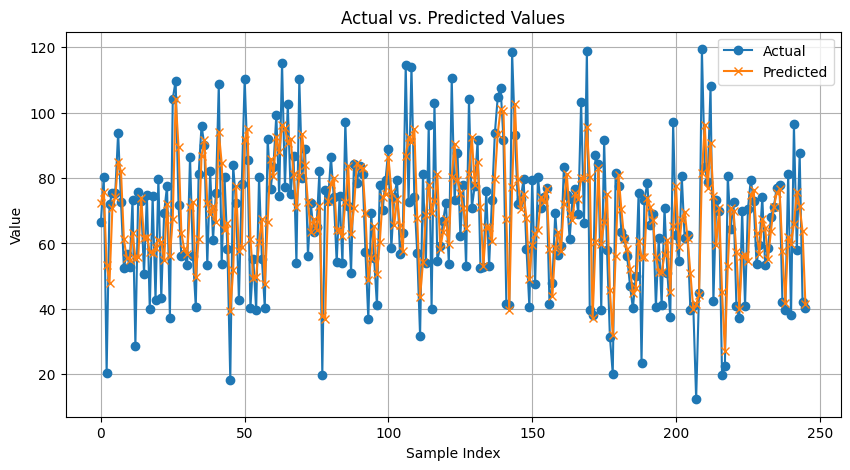

Results saved to Excel file: moving_average_Multi_results_DS3.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use the best window size found from the random search
best_window_size = 2

# Calculate moving averages for each feature using the best window size
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=best_window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=best_window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_Multi_results_DS3.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


# **Arima**

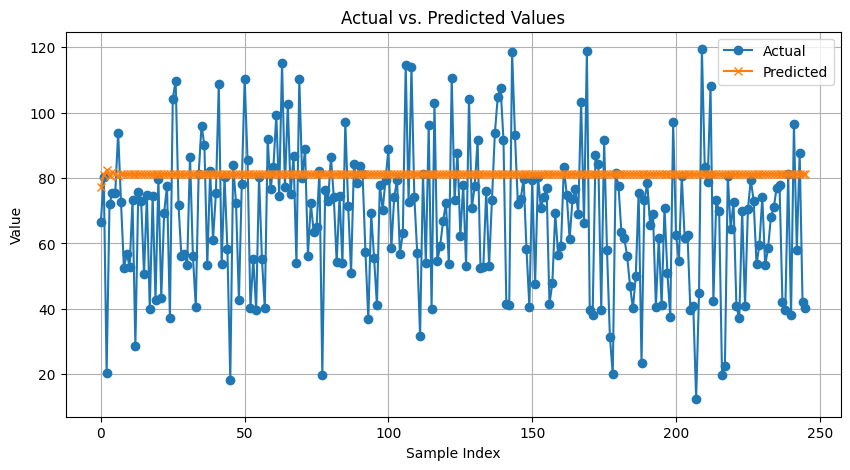

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming y_train and y_test are defined and are numpy arrays
# You might need to adjust these data as pandas Series if needed

# Fit an ARIMA model
# p (periods to lag for autoregressive model), d (degree of differencing), q (size of moving average window)
p, d, q = 5, 1, 0  # These are example parameters that you might need to tune for your dataset
model = ARIMA(y_train, order=(p, d, q))
fitted_model = model.fit()

# Predict
# Start and end indices to predict in the test set
start_index = len(y_train)
end_index = start_index + len(y_test) - 1
y_pred_arima = fitted_model.predict(start=start_index, end=end_index, dynamic=True)

# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions
plot_predictions(y_test, y_pred_arima)


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_arima)
print(f'MAE: {mae}')

# Calculate MAD
mad = np.mean(np.abs(y_pred_arima - y_test))
print(f'MAD: {mad}')

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_arima)
print(f'MAPE: {mape}')


RMSE: 25.405813826102584
MAE: 20.045757829954887
MAD: 20.045757829954887
MAPE: 44.41447205235009


Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 5) RMSE=21.514
ARIMA(2, 0, 2) RMSE=21.554
ARIMA(4, 1, 1) RMSE=21.529
ARIMA(1, 1, 3) RMSE=21.529


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(1, 1, 5) RMSE=21.523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) RMSE=21.463
ARIMA(1, 2, 3) RMSE=21.685
ARIMA(5, 2, 0) RMSE=504.573
ARIMA(1, 1, 0) RMSE=27.044


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 4) RMSE=21.725
ARIMA(0, 1, 2) RMSE=21.532
ARIMA(3, 0, 0) RMSE=21.527
ARIMA(2, 0, 2) RMSE=21.554


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 2) RMSE=31.041


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) RMSE=21.460
ARIMA(4, 0, 0) RMSE=21.529


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 3) RMSE=21.685


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 2) RMSE=21.529


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) RMSE=21.516
ARIMA(1, 1, 4) RMSE=21.528
ARIMA(1, 1, 4) RMSE=21.528


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 4) RMSE=21.774
ARIMA(5, 0, 1) RMSE=21.529
ARIMA(5, 0, 0) RMSE=21.529


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 5) RMSE=21.523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 5) RMSE=21.510


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3) RMSE=21.914
ARIMA(1, 2, 0) RMSE=285.250
ARIMA(3, 1, 1) RMSE=21.528


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 5) RMSE=21.523
ARIMA(2, 0, 3) RMSE=21.530


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 5) RMSE=21.693
ARIMA(2, 2, 1) RMSE=25.548
ARIMA(0, 1, 1) RMSE=21.535


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 5) RMSE=21.693


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) RMSE=21.523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 4) RMSE=21.495


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) RMSE=21.722
ARIMA(3, 0, 2) RMSE=21.529


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 3) RMSE=21.806


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 2) RMSE=21.525


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 2, 2) RMSE=31.041


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=22.004
ARIMA(5, 0, 1) RMSE=21.529
ARIMA(0, 1, 0) RMSE=26.091


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 5) RMSE=21.468
ARIMA(2, 0, 0) RMSE=21.522


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 5) RMSE=21.517


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 4) RMSE=21.532
ARIMA(1, 2, 2) RMSE=21.809
ARIMA(2, 1, 0) RMSE=26.300
ARIMA(1, 0, 2) RMSE=21.527
ARIMA(1, 0, 0) RMSE=21.522
ARIMA(0, 1, 2) RMSE=21.532


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 3) RMSE=21.750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 2) RMSE=22.043
ARIMA(4, 1, 3) RMSE=21.543
ARIMA(0, 0, 0) RMSE=21.522
ARIMA(4, 2, 0) RMSE=370.246
ARIMA(0, 2, 2) RMSE=21.843
ARIMA(0, 1, 1) RMSE=21.535
ARIMA(2, 0, 4) RMSE=21.555
ARIMA(0, 2, 2) RMSE=21.843
ARIMA(5, 1, 0) RMSE=25.406
ARIMA(0, 1, 1) RMSE=21.535
ARIMA(0, 1, 2) RMSE=21.532
ARIMA(3, 0, 1) RMSE=21.529
ARIMA(5, 1, 0) RMSE=25.406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 5) RMSE=21.523
ARIMA(1, 0, 5) RMSE=21.530
ARIMA(2, 0, 2) RMSE=21.554
ARIMA(4, 2, 2) RMSE=26.464
ARIMA(0, 2, 0) RMSE=671.421


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 2) RMSE=21.514
ARIMA(1, 0, 4) RMSE=21.531
ARIMA(3, 1, 0) RMSE=26.514
ARIMA(3, 0, 0) RMSE=21.527
ARIMA(1, 0, 5) RMSE=21.530


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 5) RMSE=21.510
ARIMA(1, 2, 4) RMSE=21.692
ARIMA(1, 0, 0) RMSE=21.522
ARIMA(4, 0, 1) RMSE=21.529
ARIMA(5, 1, 0) RMSE=25.406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3) RMSE=21.914
ARIMA(2, 0, 0) RMSE=21.522


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3) RMSE=21.914


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 4) RMSE=21.722


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) RMSE=21.914


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 5) RMSE=21.895
ARIMA(5, 1, 1) RMSE=21.529
ARIMA(3, 1, 1) RMSE=21.528
ARIMA(1, 0, 3) RMSE=21.531
ARIMA(3, 1, 2) RMSE=21.526
ARIMA(2, 2, 1) RMSE=25.548
ARIMA(0, 2, 0) RMSE=671.421
ARIMA(4, 2, 1) RMSE=26.047


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 2) RMSE=21.525
ARIMA(0, 0, 5) RMSE=21.529
ARIMA(4, 1, 3) RMSE=21.543
ARIMA(0, 0, 3) RMSE=21.526
Best ARIMA(2, 1, 3) RMSE=21.460


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


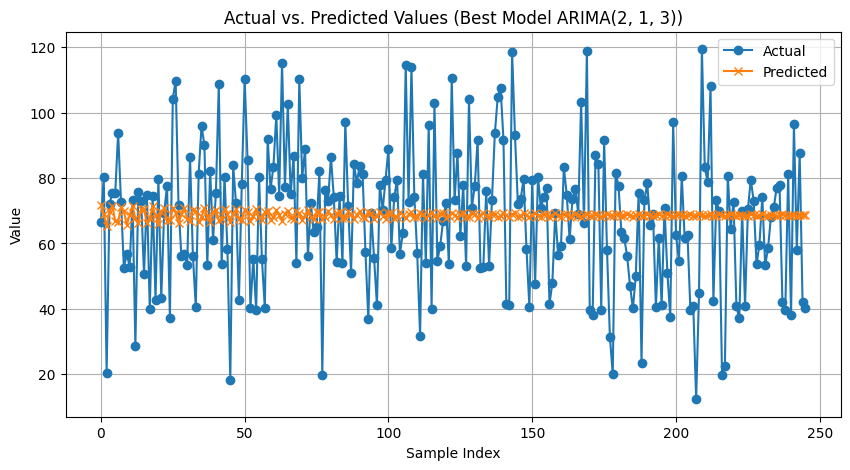

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

# Assuming y_train and y_test are numpy arrays or pandas Series

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # Define how many iterations you'd like to perform

best_score, best_order = float("inf"), None

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)
    try:
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
        error = mean_squared_error(y_test, predictions, squared=False)
        if error < best_score:
            best_score, best_order = error, order
        print(f'ARIMA{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'ARIMA{order} encountered an error: {e}')
        continue

print(f'Best ARIMA{best_order} RMSE={best_score:.3f}')

# Fit the best ARIMA model found via random search
best_model = ARIMA(y_train, order=best_order)
best_model_fit = best_model.fit()
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best Model ARIMA{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best Model ARIMA(2,1,3)
RMSE: 21.460
MAE: 17.225
MAD: 17.225
MAPE: 34.228%


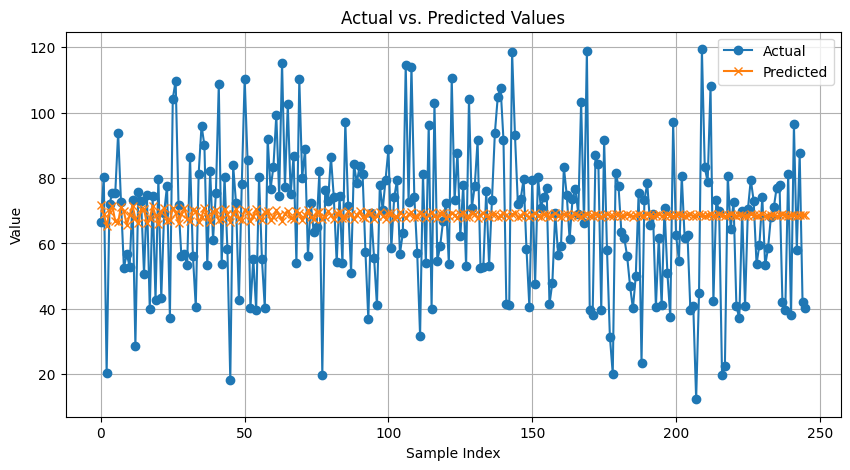

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are defined as numpy arrays or pandas Series

# Best model parameters from the grid search
best_p, best_d, best_q = 2, 1, 3

# Fit the best ARIMA model
best_model = ARIMA(y_train, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate various error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
mad = np.mean(np.abs(y_test - y_pred_best))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100  # MAPE

print(f'Best Model ARIMA({best_p},{best_d},{best_q})')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAD: {mad:.3f}')
print(f'MAPE: {mape:.3f}%')


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# # Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
results_df.to_excel('Arima_Uni_Results_DS3.xlsx', index=False)


Arima Multivariate

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, X_test, y_train, y_test are predefined and are numpy arrays
# The feature_names list is assumed to be already defined as you've indicated

# Best SARIMAX model parameters found from the search (update these values accordingly)
best_p, best_d, best_q = 4, 2, 5

# Fit the best SARIMAX model with the exogenous variables
best_sarimax_model = SARIMAX(y_train, order=(best_p, best_d, best_q), exog=X_train)
best_sarimax_model_fit = best_sarimax_model.fit(disp=False)

# Make predictions including the exogenous variables
y_pred_sarimax = best_sarimax_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, typ='levels')

# Calculate RMSE, MAE, MAD, and MAPE
rmse_sarimax = np.sqrt(mean_squared_error(y_test, y_pred_sarimax))
mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
mad_sarimax = np.mean(np.abs(y_test - y_pred_sarimax))  # Mean Absolute Deviation
mape_sarimax = np.mean(np.abs((y_test - y_pred_sarimax) / y_test)) * 100  # MAPE in percentage

print(f"SARIMAX({best_p},{best_d},{best_q}) RMSE: {rmse_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAE: {mae_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAD: {mad_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAPE: {mape_sarimax:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(4,2,5) RMSE: 6.48
SARIMAX(4,2,5) MAE: 5.56
SARIMAX(4,2,5) MAD: 5.56
SARIMAX(4,2,5) MAPE: 9.69%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


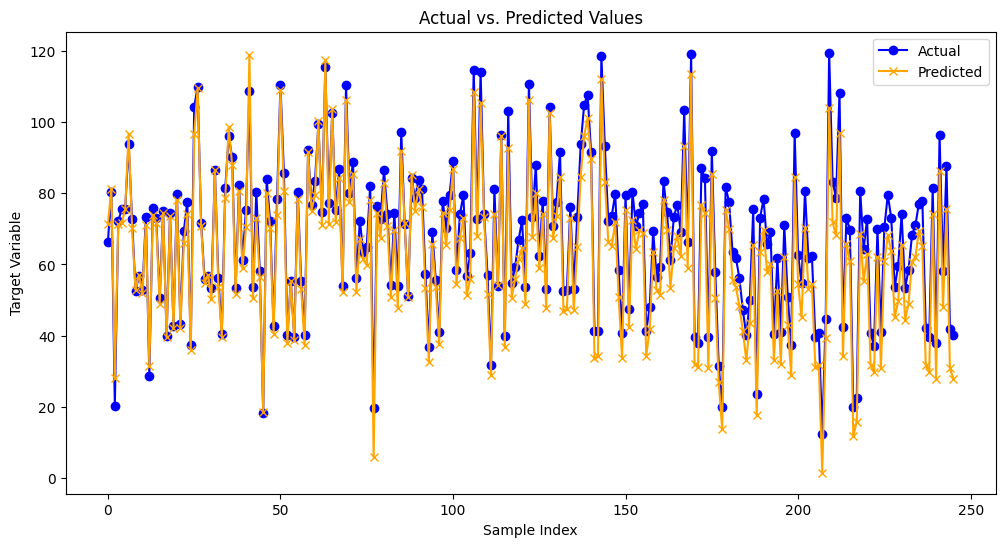

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(y_pred_sarimax, label='Predicted', color='orange', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 1) RMSE=2.131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 5) RMSE=2.142
Random Search SARIMAX(4, 0, 1) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 4) RMSE=2.182


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 5) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 0) RMSE=2.170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 3) RMSE=2.148


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=2.219
Random Search SARIMAX(0, 2, 3) RMSE=2.256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 2) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 4) RMSE=2.238


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 0) RMSE=108.896


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 4) RMSE=2.143
Random Search SARIMAX(2, 0, 0) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 3) RMSE=2.162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 4) RMSE=2.131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 1) RMSE=2.125


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 5) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 5) RMSE=2.130


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 5) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 3) RMSE=2.204


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 5) RMSE=2.122


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 3) RMSE=2.129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 5) RMSE=2.122


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=2.128
Random Search SARIMAX(3, 0, 1) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 1) RMSE=2.172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=2.191
Random Search SARIMAX(3, 0, 2) RMSE=2.142


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 3) RMSE=2.159
Random Search SARIMAX(2, 1, 0) RMSE=2.152
Random Search SARIMAX(0, 2, 0) RMSE=300.926
Random Search SARIMAX(2, 0, 0) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 4) RMSE=2.131
Random Search SARIMAX(4, 0, 0) RMSE=2.143
Random Search SARIMAX(3, 0, 0) RMSE=2.143
Random Search SARIMAX(1, 0, 0) RMSE=2.145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 5) RMSE=2.124


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 2) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 1) RMSE=2.125


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 4) RMSE=2.129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 5) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 2) RMSE=2.130


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 3) RMSE=2.130
Random Search SARIMAX(3, 0, 4) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 1) RMSE=2.125


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 4) RMSE=2.573


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 1) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 1) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=2.128


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 1) RMSE=2.130


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 1) RMSE=2.172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 5) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 4) RMSE=2.156
Random Search SARIMAX(3, 0, 4) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=2.836


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 5) RMSE=2.211


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=2.191
Random Search SARIMAX(3, 0, 1) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 2) RMSE=2.146


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 5) RMSE=2.211


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 3) RMSE=2.132


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 1) RMSE=2.235


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 5) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 2) RMSE=2.127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=2.611


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 4) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 1) RMSE=2.131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 3) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 4) RMSE=2.131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 1) RMSE=2.134


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 3) RMSE=2.162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 0) RMSE=192.242


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 1) RMSE=2.134
Random Search SARIMAX(5, 0, 0) RMSE=2.143
Random Search SARIMAX(4, 0, 0) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 0) RMSE=2.170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=2.160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 1) RMSE=2.235


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 4) RMSE=2.238


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 3) RMSE=2.130
Random Search SARIMAX(1, 0, 5) RMSE=2.145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 0) RMSE=2.170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 4) RMSE=2.156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 5) RMSE=2.124


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 5) RMSE=2.211
Random Search SARIMAX(4, 0, 1) RMSE=2.144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 1) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 1) RMSE=2.143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 4) RMSE=2.156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 5) RMSE=2.247


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=2.142
Best SARIMAX(5, 1, 5) RMSE=2.122


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


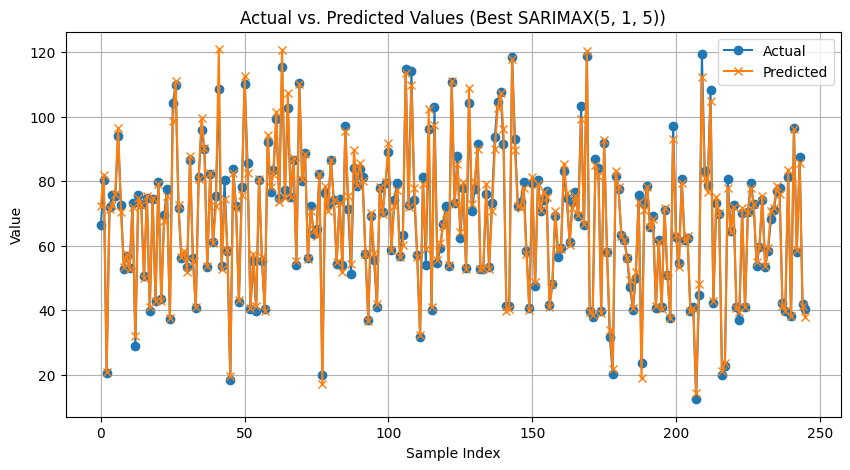

In [ ]:
import numpy as np
import pandas as pd
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are predefined numpy arrays
# Assuming feature_names is a list with your feature names

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # or any other number of iterations you want

best_score, best_order = float("inf"), None
best_params = {}

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)

    try:
        # Fit the SARIMAX model (include exogenous variables if available)
        model = SARIMAX(y_train, exog=X_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Predict (include exogenous variables if available)
        y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

        # Calculate the error
        error = mean_squared_error(y_test, y_pred, squared=False)

        # Compare and store the best score
        if error < best_score:
            best_score, best_order = error, order
            best_params = {'p': p, 'd': d, 'q': q}

        print(f'Random Search SARIMAX{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'Error with SARIMAX{order}: {e}')
        continue

print(f'Best SARIMAX{best_order} RMSE={best_score:.3f}')

# Fit the best SARIMAX model found via random search
best_model = SARIMAX(y_train, exog=X_train, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
best_model_fit = best_model.fit(disp=False)

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best SARIMAX{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima for multivariate

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 2.122
MAE: 1.493
MAD: 1.493
MAPE: 2.328%


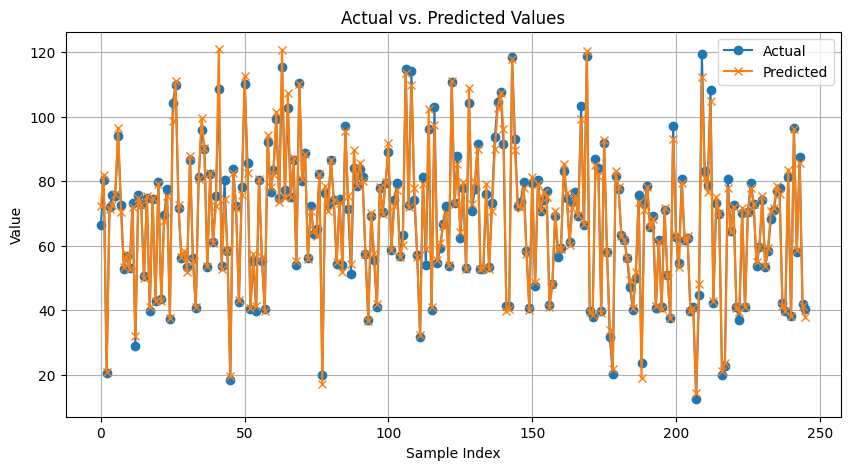

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are numpy arrays or pandas Series
# Assuming X_train and X_test are numpy arrays or pandas DataFrames corresponding to exogenous variables

# Best model parameters identified (p=5, d=0, q=2)
p, d, q = 5, 1, 5

# Fit the SARIMAX model using the best parameters
model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions using the fitted model
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

# Print the error metrics
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Arima_Multi_results_DS3.xlsx', index=False)

# **Stacking**

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found 

RMSE: 2.1441045196062607
MAE: 1.5561173996872437
MAD: 1.1888013534216526
R-squared: 0.9900560448631398


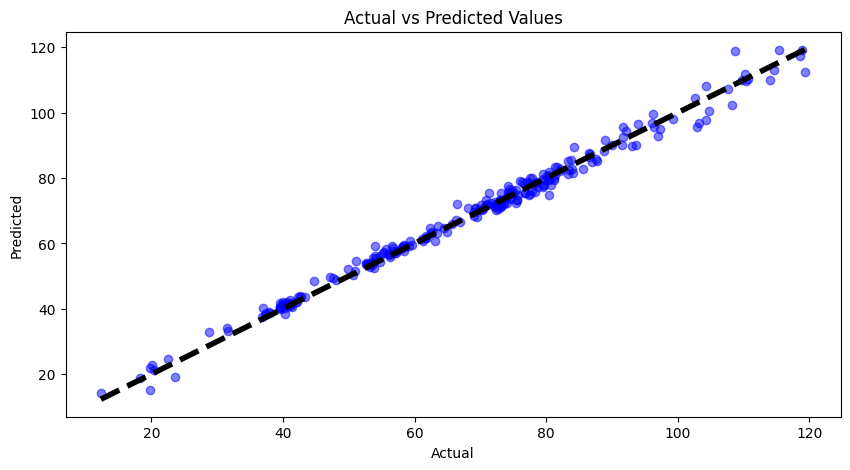

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define custom regressor for SARIMAX
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Define custom regressor for Polynomial Regression
class CustomPolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2):
        self.degree = degree

    def fit(self, X, y):
        self.model = make_pipeline(PolynomialFeatures(degree=self.degree), LinearRegression())
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create Gaussian Process Model
kernel = C(4.41, (1e-2, 1e2)) * RBF(3.01, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(5, 1, 5))
poly_model = CustomPolynomialRegression(degree=2)
lr_model = LinearRegression()

# Define the stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_DS3.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



with PCA

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found 

RMSE: 2.1410706543397313
MAE: 1.5528605226880359
MAD: 1.1619689914861873
R-squared: 0.9900841659512931


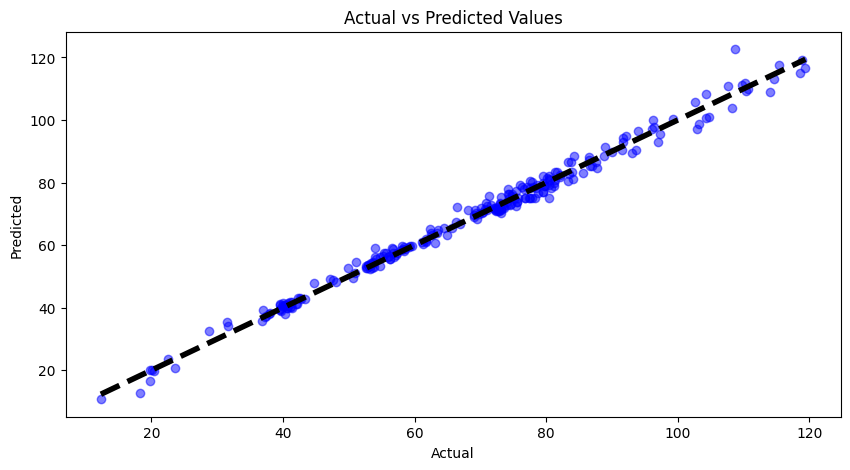

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Custom SARIMAX model as before
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Custom Polynomial Regression with PCA
class CustomPCA_PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2, n_components=None):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = Pipeline([
            ('pca', PCA(n_components=self.n_components)),
            ('poly', PolynomialFeatures(degree=self.degree)),
            ('linear', LinearRegression())
        ])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Gaussian Process Model
kernel = C(4.41, (1e-2, 1e2)) * RBF(3.01, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(5, 1, 5))
poly_model = CustomPCA_PolynomialRegression(degree=2, n_components=10)
lr_model = LinearRegression()

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)



plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_with PCA_DS3.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


Stacking with random forest

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value

RMSE: 2.3692746657636126
MAE: 1.7036727642276406
MAD: 1.2737000000000052
R-squared: 0.9878577806838089


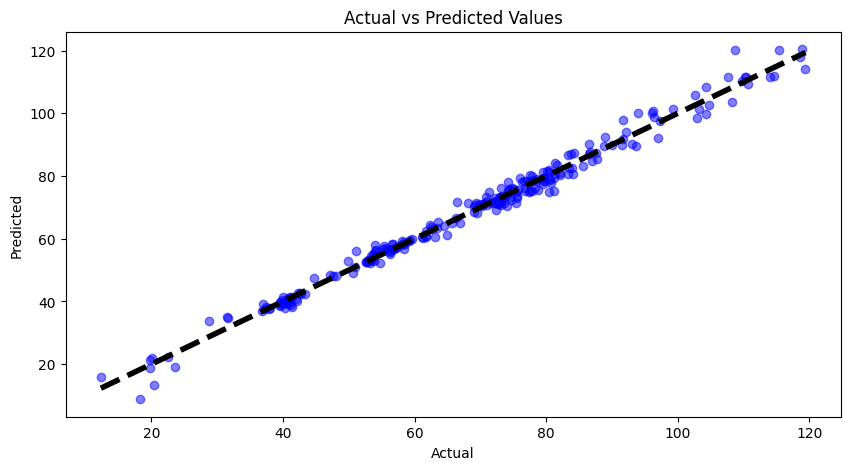

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Custom SARIMAX model as before
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Custom Polynomial Regression with PCA
class CustomPCA_PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=2, n_components=None):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = Pipeline([
            ('pca', PCA(n_components=self.n_components)),
            ('poly', PolynomialFeatures(degree=self.degree)),
            ('linear', LinearRegression())
        ])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Gaussian Process Model
kernel = C(4.41, (1e-2, 1e2)) * RBF(3.01, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models
sarimax_model = CustomSARIMAX(order=(5, 1, 5))
poly_model = CustomPCA_PolynomialRegression(degree=2, n_components=10)
lr_model = LinearRegression()

# Stacking Ensemble with a more complex final estimator
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
)

# Assume X_train, X_test, y_train, y_test are defined
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Randomforest_Results_ST_with PCA_DS3.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


Stacking with Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value

RMSE: 2.443434245166128
MAE: 1.8169852409384148
MAD: 1.398151303820491
R-squared: 0.9870857685884731


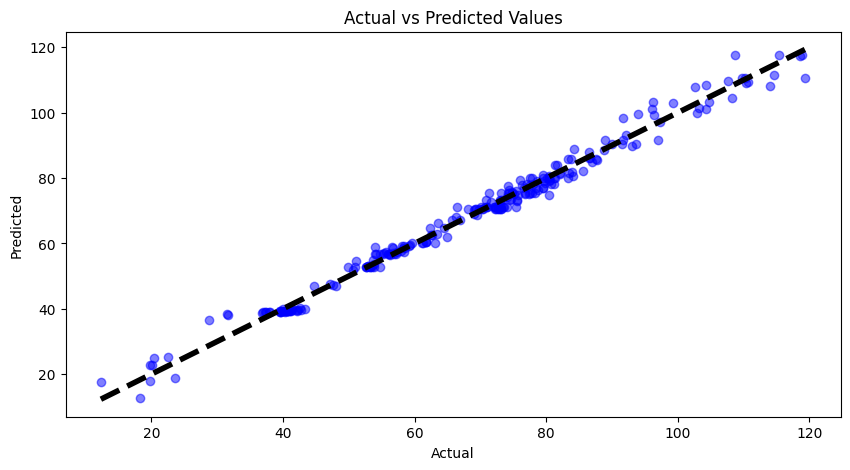

Results saved to Excel file 'Stacking_Results_with_AdaBoost.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# Initialize your existing model components
# Assuming you have already defined sarimax_model, gp_model, poly_model, lr_model as before

# Stacking Ensemble with AdaBoost as the final estimator
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),  # Gaussian Process
        ('poly', poly_model),  # Polynomial Regression with PCA
        ('sarimax', sarimax_model),  # Custom SARIMAX
        ('lr', lr_model)  # Linear Regression
    ],
    final_estimator=AdaBoostRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=4),
        n_estimators=100,
        random_state=42,
        learning_rate=0.05
    )
)

# Fit the model on your training data
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)

# Plotting the actual vs predicted values if needed
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Optionally save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_with_AdaBoost.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results_with_AdaBoost.xlsx'.")


### ***Machine Learning model ***

# **KNN**

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


n_neighbors = [3, 5, 7, 9, 11, 13, 15, 17]
scores = {}

for n_neighbor in n_neighbors:
    # Initialize and train regressor
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test, y_pred_knn)
    mad = median_absolute_error(y_test, y_pred_knn)
    mape = mean_absolute_percentage_error(y_test, y_pred_knn)

    # Store results in dictionary
    scores[n_neighbor] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for k, v in scores.items():
    print(f"Number of Neighbors: {k}")
    for score_name, score_value in v.items():
        print(f"{score_name}: {score_value:.2f}")
    print("")  # Newline for better readability


Number of Neighbors: 3
RMSE: 3.21
MAE: 1.60
MAD: 0.83
MAPE: 3.82

Number of Neighbors: 5
RMSE: 2.67
MAE: 1.73
MAD: 1.14
MAPE: 3.41

Number of Neighbors: 7
RMSE: 2.78
MAE: 1.92
MAD: 1.24
MAPE: 3.35

Number of Neighbors: 9
RMSE: 2.90
MAE: 2.01
MAD: 1.33
MAPE: 3.23

Number of Neighbors: 11
RMSE: 2.98
MAE: 2.06
MAD: 1.34
MAPE: 3.30

Number of Neighbors: 13
RMSE: 3.12
MAE: 2.14
MAD: 1.30
MAPE: 3.43

Number of Neighbors: 15
RMSE: 3.22
MAE: 2.17
MAD: 1.41
MAPE: 3.51

Number of Neighbors: 17
RMSE: 3.36
MAE: 2.25
MAD: 1.38
MAPE: 3.67



Random search

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd

# Define a function for MAPE as it's not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter range for RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(1, 31),  # Let's say we're testing n_neighbors between 1 and 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Create a KNN regressor object
knn = KNeighborsRegressor()

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,  # Adjust based on how many iterations you want to perform
    scoring='neg_mean_squared_error',  # Negative MSE for optimization
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


Best KNN

RMSE: 2.7265696034800593
MAE: 1.8801257102609985
MAD: 1.2248665326275514
MAPE: None%


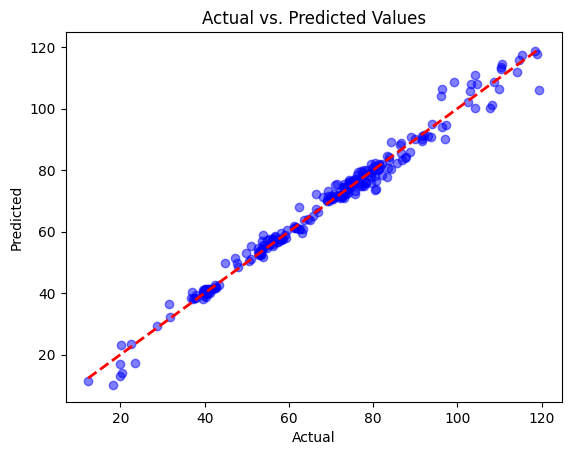

Results have been saved to Excel file 'KNN_Results_DS3.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure the inputs are arrays to prevent unexpected 'scalar' behavior
    y_true, y_pred = np.array(y_true, ndmin=1), np.array(y_pred, ndmin=1)

    # Check if any of the arrays is unexpectedly scalar or zero-dimensional
    if y_true.ndim == 0 or y_pred.ndim == 0:
        raise ValueError("Input arrays should be one-dimensional or higher.")

    # Avoid division by zero
    mask = y_true != 0
    if not np.any(mask):  # If all values are zero, return NaN to avoid invalid calculations
        return np.nan




# Create KNN regressor with the best parameters
knn = KNeighborsRegressor(n_neighbors=10, p=2, weights='distance')

# Fit KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the validation set
y_test_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, v)

# Output the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('KNN_Results_DS3.xlsx', index=False)

print("Results have been saved to Excel file 'KNN_Results_DS3.xlsx'.")


# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Parameters for Decision Tree
max_depths = [3, 5, 7, 9, 11, 13, 15, 17]  # Example max_depths, typically used to prevent overfitting
scores = {}

for max_depth in max_depths:
    # Initialize and train regressor
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test, y_pred_dt)
    mad = median_absolute_error(y_test, y_pred_dt)
    mape = mean_absolute_percentage_error(y_test, y_pred_dt)

    # Store results in dictionary
    scores[max_depth] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for depth, vals in scores.items():
    print(f"Max Depth: {depth}")
    for metric_name, metric_value in vals.items():
        print(f"{metric_name}: {metric_value:.2f}")
    print("")  # Newline for better readability


Max Depth: 3
RMSE: 3.74
MAE: 2.75
MAD: 2.15
MAPE: 4.45

Max Depth: 5
RMSE: 2.29
MAE: 1.69
MAD: 1.27
MAPE: 2.81

Max Depth: 7
RMSE: 2.61
MAE: 1.73
MAD: 1.29
MAPE: 2.76

Max Depth: 9
RMSE: 2.59
MAE: 1.74
MAD: 1.15
MAPE: 2.82

Max Depth: 11
RMSE: 2.70
MAE: 1.78
MAD: 1.14
MAPE: 2.88

Max Depth: 13
RMSE: 2.71
MAE: 1.87
MAD: 1.30
MAPE: 3.05

Max Depth: 15
RMSE: 2.58
MAE: 1.74
MAD: 1.21
MAPE: 2.82

Max Depth: 17
RMSE: 2.73
MAE: 1.78
MAD: 1.20
MAPE: 2.81



Random Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the parameter distributions to sample from
param_dist = {
    'max_depth': randint(3, 20),  # Depths from 3 to 20
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 20)   # Minimum number of samples required at each leaf node
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mad = median_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 8}
RMSE: 2.402877129665295
MAE: 1.7285686179226178
MAD: 1.3187633813215136
MAPE: 3.0033668706807335%


Best Decision tree

Test RMSE: 2.402877129665295
Test MAE: 1.7285686179226178
Test MAD: 1.3187633813214958
Test MAPE: 3.003366870680733%


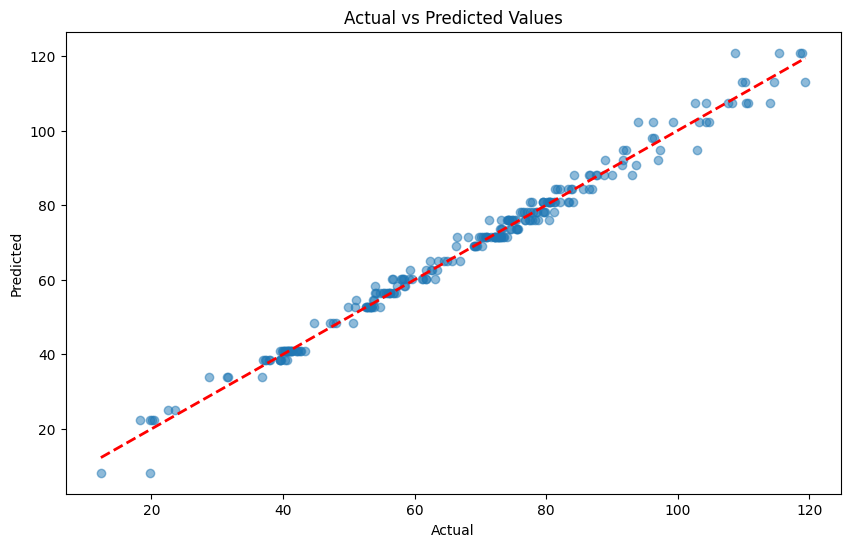

Results have been saved to Excel file 'DecisionTree_Results_DS3.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create the Decision Tree Regressor with specified best parameters
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

# Assuming X_train, y_train, X_test, y_test are already defined
# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the test data
y_test_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('DecisionTree_Results_DS3.xlsx', index=False)

print("Results have been saved to Excel file 'DecisionTree_Results_DS3.xlsx'.")


# **SVR**

Test RMSE: 2.163468613196519
Test MAE: 1.6315870587121815
Test MAD: 1.2758801937628235
Test MAPE: 2.871336093568481%


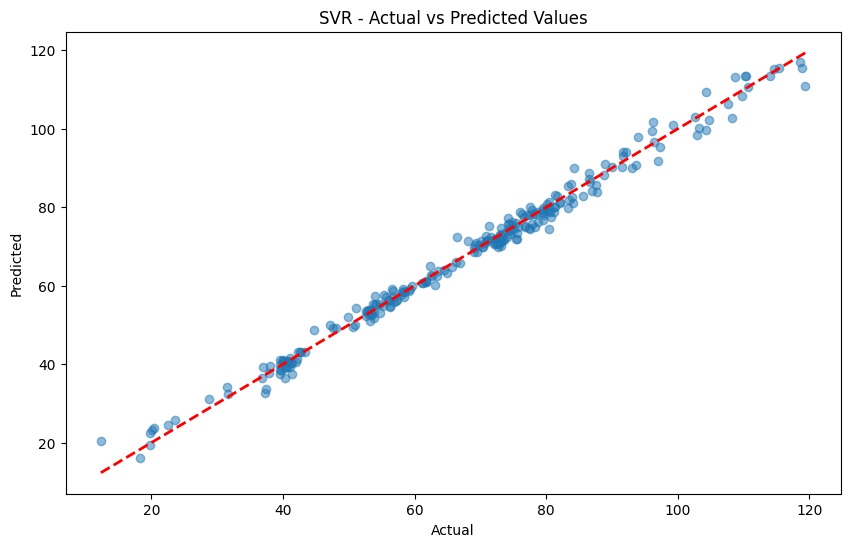

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, y_train, X_test, y_test are already defined and split
# Standardizing data - very important for SVR
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define and configure the SVR model
# Note: Hyperparameters should be chosen based on a previous analysis such as using GridSearchCV or RandomizedSearchCV
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Example parameters

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()






Random search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.1s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.1s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.1s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.1s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, ga

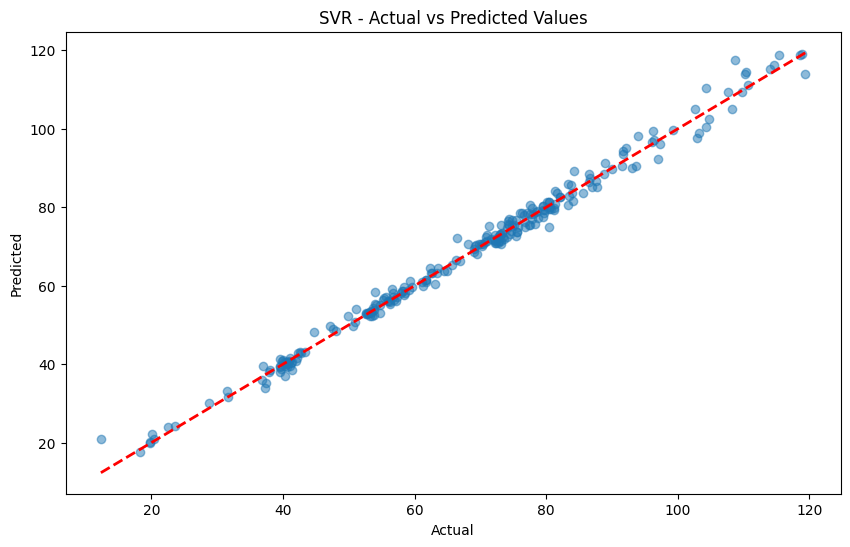

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the parameter distributions to sample from
param_dist = {
    'C': loguniform(1e-2, 1e2),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e-1),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': loguniform(1e-4, 1e-1)  # Epsilon in the epsilon-SVR model
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=SVR(kernel='rbf'),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    verbose=2,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train_scaled)

# Best model found by random search
best_model = random_search.best_estimator_

# Make predictions using the best model on the test set
y_test_pred_scaled = best_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()



Best SVR

Test RMSE: 1.9751471649028962
Test MAE: 1.4047659538184172
Test MAD: 0.9828317511815214
Test MAPE: 2.352404456148444%


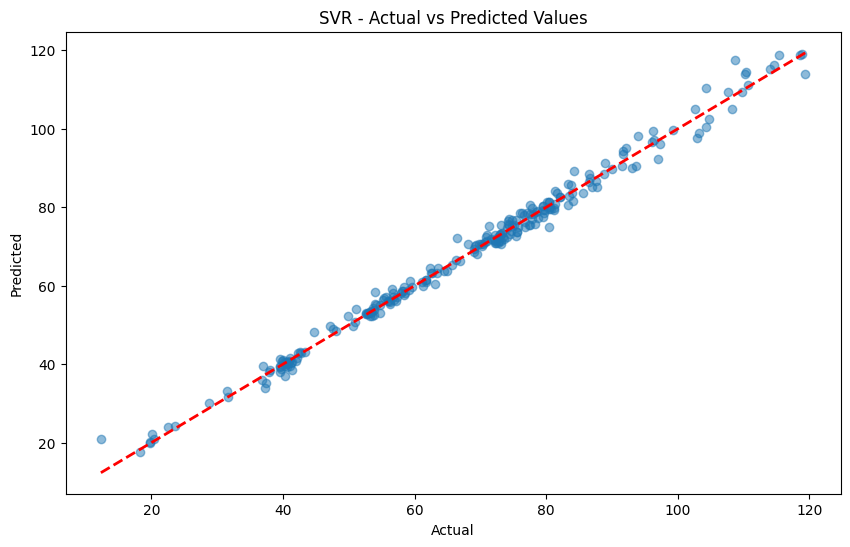

Results have been saved to Excel file 'SVR_Results_DS3.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_model = SVR(C=3.4167643418329705, epsilon=0.04115113049561093, gamma=0.025764174425233172)

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('SVR_Results_DS3.xlsx', index=False)

print("Results have been saved to Excel file 'SVR_Results_DS3.xlsx'.")

# **Stacking**

RMSE: 2.0999
MAE: 1.5532
MAD: 1.2165
MAPE: -2.5405%


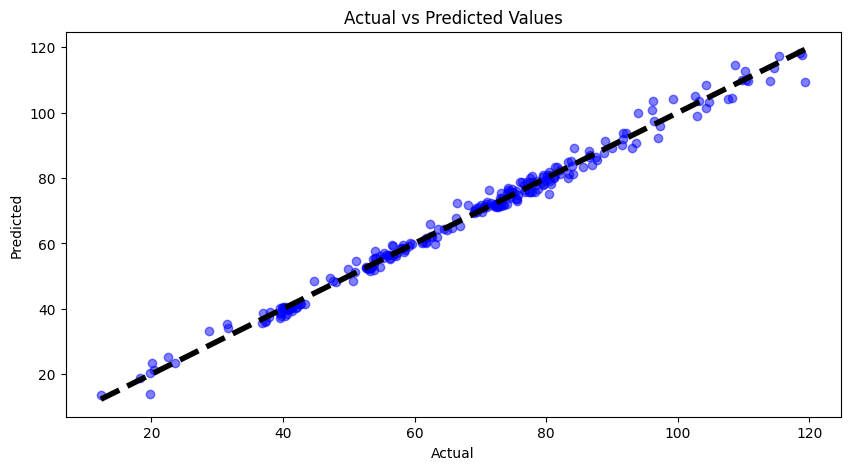

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom class to calculate MAPE, since it's not directly available in sklearn
class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        # Dummy prediction method, actual implementation is not necessary for the metric calculation
        pass

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps  # To avoid division by zero
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape  # Negative MAPE for consistency with other score methods that assume 'higher is better'

# Load or define your data here
# X_train, X_test, y_train, y_test = ...

# Decision Tree with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

# KNN with optimized parameters
knn = KNeighborsRegressor(n_neighbors=10, p=2, weights='distance')

# SVR with optimized parameters
svr = make_pipeline(StandardScaler(), SVR(C=3.4167643418329705, epsilon=0.04115113049561093, gamma=0.025764174425233172))

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)  # Using the custom MAPE scorer

# Output the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_DS3.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")


Ensamble with random forest

Stacking Model Results:
RMSE: 2.0503, MAE: 1.4759, MAD: 1.1186
Random Forest Model Results:
RMSE: 2.1543, MAE: 1.4572, MAD: 1.0075


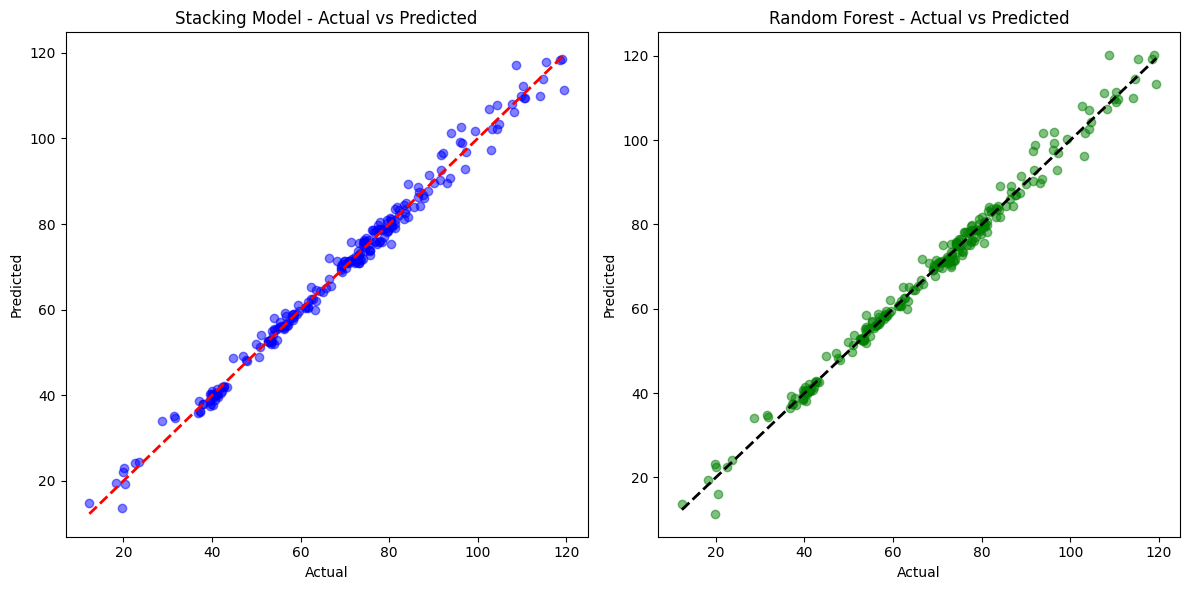

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
# Decision Tree with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)

# KNN with optimized parameters
knn = KNeighborsRegressor(n_neighbors=10, p=2, weights='distance')

# SVR with optimized parameters and scaling
svr = make_pipeline(StandardScaler(), SVR(C=3.4167643418329705, epsilon=0.04115113049561093, gamma=0.025764174425233172))

# Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Stacking Ensemble with a different final estimator
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr),
        ('random_forest', random_forest)
    ],
    final_estimator=Ridge(alpha=1.0)
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predictions with the stacking model
y_pred_stack = stacked_model.predict(X_test)

# Fit the Random Forest model separately
random_forest.fit(X_train, y_train)

# Predictions with the Random Forest model
y_pred_rf = random_forest.predict(X_test)

# Evaluation metrics for Stacking model
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mad_stack = median_absolute_error(y_test, y_pred_stack)

# Evaluation metrics for Random Forest model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mad_rf = median_absolute_error(y_test, y_pred_rf)

# Output the results for both models
print("Stacking Model Results:")
print(f'RMSE: {rmse_stack:.4f}, MAE: {mae_stack:.4f}, MAD: {mad_stack:.4f}')
print("Random Forest Model Results:")
print(f'RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, MAD: {mad_rf:.4f}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_stack, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Stacking Model - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=2)
plt.title('Random Forest - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


Enhanced Stacking

Enhanced Stacking Model - Test RMSE: 1.93
Test MAE: 1.40
Test MAD: 1.06


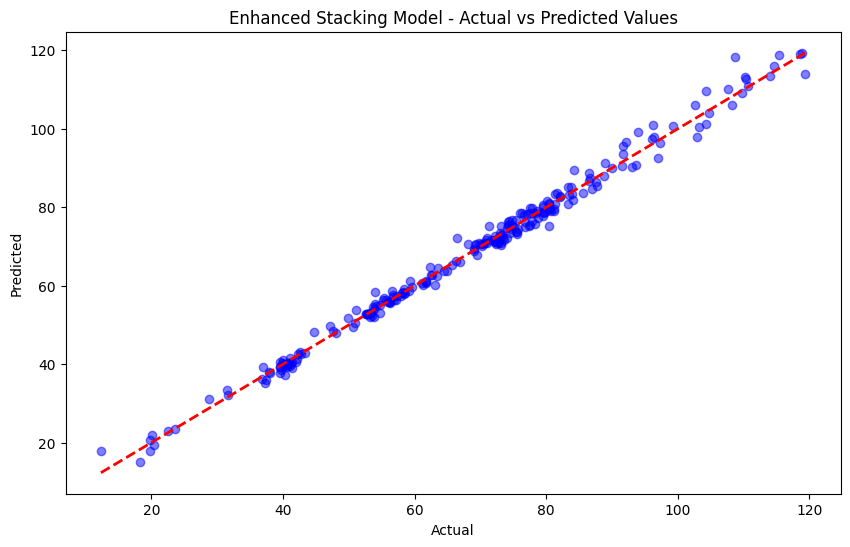

Results have been saved to Excel file: Enhanced_Stacking_Results.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Initialize base models with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8)
knn = KNeighborsRegressor(n_neighbors=10, p=2, weights='distance')
svr = make_pipeline(StandardScaler(), SVR(C=3.4167643418329705, epsilon=0.04115113049561093, gamma=0.025764174425233172))
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100)

# Set up the stacking ensemble with a Ridge regression with cross-validation as the final estimator
stacked_model = StackingRegressor(
    estimators=[
        ('svr', svr),
        ('rf', random_forest),
        ('knn', knn),
        ('dt', decision_tree),
        ('gb', gradient_boosting)
    ],
    final_estimator=RidgeCV()
)

# Fit the stacking ensemble
stacked_model.fit(X_train_scaled, y_train_scaled)

# Predictions
y_test_pred_scaled = stacked_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Enhanced Stacking Model - Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test MAD: {mad:.2f}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Enhanced Stacking Model - Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_path = 'Enhanced_Stacking_Results_DS3.xlsx'
results_df.to_excel(results_path, index=False)
print(f"Results have been saved to Excel file: {results_path}")



with PCA

RMSE: 2.4738
MAE: 1.7622
MAD: 1.3588
MAPE: -2.9802%


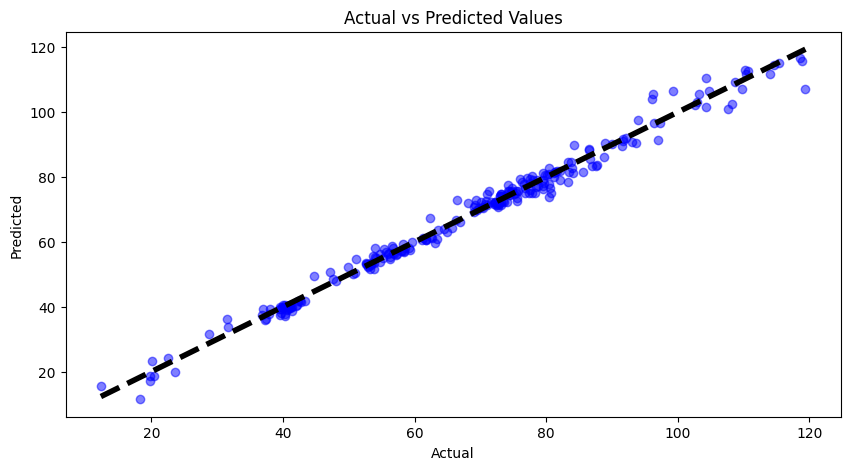

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Corrected import
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        pass  # Dummy, not used

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape

# Example data preparation
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

n_components = 15  # Number of PCA components to keep

decision_tree = make_pipeline(PCA(n_components=n_components),
                              DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=8))

knn = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    KNeighborsRegressor(n_neighbors=10, p=2, weights='distance'))

svr = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    SVR(C=3.4167643418329705, epsilon=0.04115113049561093, gamma=0.025764174425233172))

stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_with PCA_DS3.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results.xlsx'.")



# **Deep Learning**

In [ ]:
# normalize your data for GRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_df)

In [ ]:
lag = 24  # Number of hours to use as input to predict the next hour
n_obs = 958  # Adjust this if needed based on your dataset size after preprocessing
features = 31  # Total number of features included

X_train = []
y_train = []

for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])
    y_train.append(training_set_scaled[i, 0])

# Convert lists to numpy arrays for training the GRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)

(934, 24, 31)


# **GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first GRU layer with 200 units
model.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second GRU layer with 100 units
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last GRU layer with 50 units
model.add(GRU(units=50))  # This is the last GRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 24, 200)           139800    
                                                                 
 dropout_14 (Dropout)        (None, 24, 200)           0         
                                                                 
 gru_15 (GRU)                (None, 24, 100)           90600     
                                                                 
 dropout_15 (Dropout)        (None, 24, 100)           0         
                                                                 
 gru_16 (GRU)                (None, 24, 50)            22800     
                                                                 
 dropout_16 (Dropout)        (None, 24, 50)            0         
                                                                 
 gru_17 (GRU)                (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 [==============================] - 14s 146ms/step - loss: 0.0668
Epoch 2/50
30/30 [==============================] - 4s 130ms/step - loss: 0.0219
Epoch 3/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0213
Epoch 4/50
30/30 [==============================] - 3s 101ms/step - loss: 0.0215
Epoch 5/50
30/30 [==============================] - 4s 133ms/step - loss: 0.0204
Epoch 6/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0200
Epoch 7/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0196
Epoch 8/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0201
Epoch 9/50
30/30 [==============================] - 4s 138ms/step - loss: 0.0200
Epoch 10/50
30/30 [==============================] - 3s 97ms/step - loss: 0.0195
Epoch 11/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0186
Epoch 12/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0187
Epoch 13/50
30/30 [============

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 [==============================] - 2s 43ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure itfor comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 22.0018
MAE: 17.9781
MAD: 17.8068
MAPE: 33.6883%
R-squared: -0.0177


Random search

In [ ]:
pip install scikeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Function to create the model, adjusted for use with Scikeras
def create_model(gru_units1=200, gru_units2=100, gru_units3=50, gru_units4=50, dropout_rate=0.1):
    model = Sequential([
        GRU(units=gru_units1, return_sequences=True, input_shape=(None, 31)),  # Modify '30' to match your feature count
        Dropout(rate=dropout_rate),
        GRU(units=gru_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units4),
        Dropout(rate=dropout_rate),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras
model = KerasRegressor(model=create_model, epochs=5, batch_size=32)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'model__gru_units1': [100, 200, 300],
    'model__gru_units2': [50, 100, 150],
    'model__gru_units3': [25, 50, 75],
    'model__gru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - loss: 0.1158
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step - loss: 0.0277
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 206ms/step - loss: 0.0223
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.0230
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0215
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  44.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - loss: 0.1880
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0292
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0264
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0248
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0254
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  24.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 0.1692
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0361
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - loss: 0.0246
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - loss: 0.0276
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - loss: 0.0226
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  28.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.2600
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0459
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0389
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0338
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0418
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  20.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.1616
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0386
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0362
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0376
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0332
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  21.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.2482
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0459
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0387
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0381
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0376
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  20.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.1231
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.0320
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0280
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0276
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0304
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  23.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.1260
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0389
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0293
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 0.0250
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0268
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  27.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 0.1367
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0301
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0284
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0290
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0251
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  26.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - loss: 0.1870
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0475
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0395
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0332
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0264
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  22.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.1262
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0373
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0359
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0295
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0265
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  20.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.1855
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0441
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0380
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0322
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0294
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  24.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - loss: 0.3911
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.0760
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0505
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0563
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - loss: 0.0494
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  32.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.2829
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0537
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0475
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 0.0482
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - loss: 0.0429
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - loss: 0.3226
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.0671
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0494
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - loss: 0.0489
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0412
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  34.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - loss: 0.1502
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.0372
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 0.0285
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0274
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0286
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  26.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - loss: 0.2122
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0424
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0310
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0260
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.0290
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  29.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 0.1502
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0354
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0315
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0272
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0281
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  26.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.1939
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0558
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - loss: 0.0364
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0409
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0377
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  31.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.2363
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0552
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0423
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - loss: 0.0388
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.0383
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  34.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.1921
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0561
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0451
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0339
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0394
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  30.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - loss: 0.2114
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0255
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 0.0225
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0210
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0194
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  36.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - loss: 0.1540
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0302
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0222
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0206
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0213
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 0.1807
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 0.0247
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0229
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0226
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 0.0202
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  35.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.4357
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.0508
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0375
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0372
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0358
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  35.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.2168
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0464
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0391
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0392
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0387
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  34.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - loss: 0.2315
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0431
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - loss: 0.0423
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 0.0355
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0324
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  37.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - loss: 0.1967
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 0.0663
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0499
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0488
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0397
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  30.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.2303
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0860
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0645
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0482
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0437
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  23.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - loss: 0.1685
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0749
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0583
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0445
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0422
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  23.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - loss: 0.2164
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0584
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0568
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0459
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - loss: 0.0351
Best parameters found:  {'model__gru_units4': 50, 'model__gru_units3': 25, 'model__gru_units2': 150, 'model__gru_units1': 200, 'model__dropout_rate': 0.5}
Best score (neg_mean_squared_error): -0.01668719629699804


In [ ]:
X_train.shape

(934, 24, 31)

Best GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
model = Sequential()
# Define the best parameters
best_params = {
    'gru_units1': 200,
    'gru_units2': 150,
    'gru_units3': 25,
    'gru_units4': 50,
    'dropout_rate': 0.5
}

# Create the GRU model with the best parameters
def create_best_model():
    model = Sequential([
        Input(shape=(24, 31)),
        GRU(units=best_params['gru_units1'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units2'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units3'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units4']),
        Dropout(best_params['dropout_rate']),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
model = create_best_model()

# Print the model summary
model.summary()



Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_124 (GRU)                        │ (None, 24, 200)             │         139,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_125 (GRU)                        │ (None, 24, 150)             │         158,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 24, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_126 (GRU)                        │ (None, 24, 25)              │          13,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 24, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_127 (GRU)                        │ (None, 50)                  │          11,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,076 (1.23 MB)

 Trainable params: 323,076 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - loss: 0.1549
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0624
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 0.0446
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0342
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0297
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 0.0308
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0274
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0331
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0282
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0274
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - loss: 0.0259
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0269
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - loss: 0.0247
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0255
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - l

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8340
MAE: 17.7258
MAD: 17.7137
MAPE: 33.9167%
R-squared: -0.0022


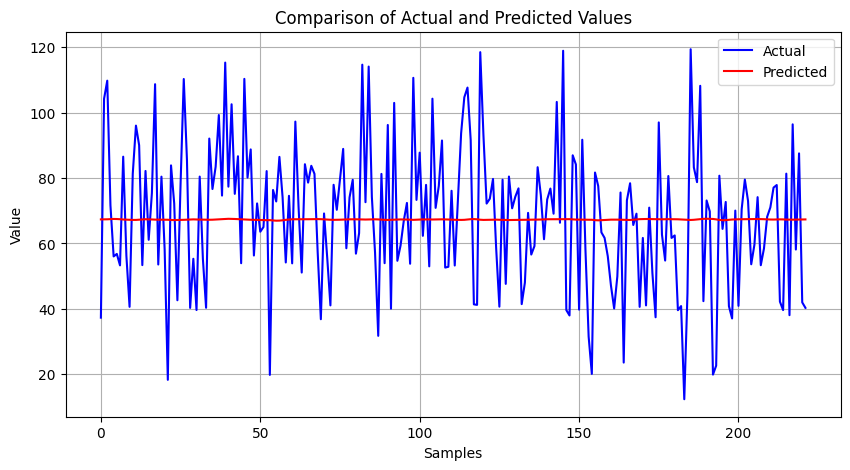

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('GRU_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first LSTM layer with 200 units
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third LSTM layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last LSTM layer with 50 units
model.add(LSTM(units=50))  # This is the last LSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.1350
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0199
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0210
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0175
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0197
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0191
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0181
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0179
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 0.0202
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0205
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0182
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0195
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0190
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0162
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - l

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8089
MAE: 17.6512
MAD: 17.6523
MAPE: 34.1376%
R-squared: 0.0001


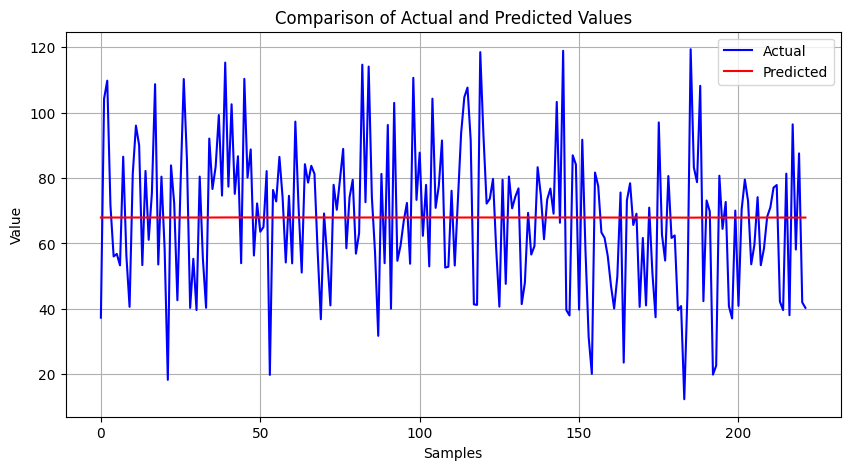

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Random search

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_model(lstm_units1=200, lstm_units2=100, lstm_units3=50, lstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        LSTM(units=lstm_units1, return_sequences=True, input_shape=(24, 31)),  # Adjusted input_shape to match X_train
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units4),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for Randomized Search
param_dist = {
    'model__lstm_units1': [100, 200],
    'model__lstm_units2': [50, 100],
    'model__lstm_units3': [25, 50, 75],
    'model__lstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  20.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  27.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  23.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  25.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  23.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__lstm_units4': 50, 'model__lstm_units3': 25, 'model__lstm_units2': 100, 'model__lstm_units1': 200, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.01604338284698189


Best LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_optimized_model():
    model = Sequential([
        LSTM(units=200, return_sequences=True, input_shape=(24, 31)),  # First LSTM layer with 100 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=100, return_sequences=True),  # Second LSTM layer with 50 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=25, return_sequences=True),  # Third LSTM layer with 25 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=50),  # Fourth LSTM layer with 25 units
        Dropout(rate=0.1),  # Dropout for regularization
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the optimized model
model = build_optimized_model()

# Model summary
print(model.summary())


model.fit(X_train, y_train, epochs=50, batch_size=32)




Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_128 (LSTM)                      │ (None, 24, 200)             │         185,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_256 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_129 (LSTM)                      │ (None, 24, 100)             │         120,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_257 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_130 (LSTM)                      │ (None, 24, 25)              │          12,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_258 (Dropout)                │ (None, 24, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_131 (LSTM)                      │ (None, 50)                  │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_259 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,851 (1.27 MB)

 Trainable params: 333,851 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.1010
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0210
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0201
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0200
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0191
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0200
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0186
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0175
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0170
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0175
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0173
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0186
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0213
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0175
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8088
MAE: 17.6202
MAD: 17.6201
MAPE: 34.2585%
R-squared: 0.0001


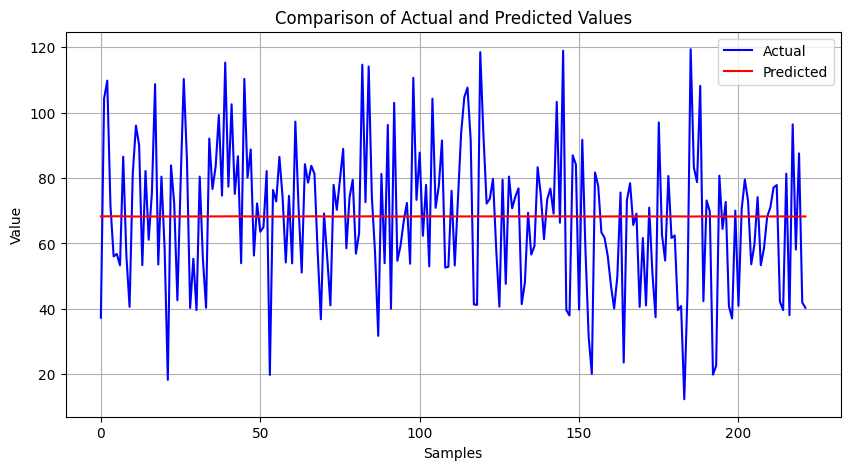

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('LSTM_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BILSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiLSTM layer with 200 units
model.add(Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiLSTM layer with 100 units
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiLSTM layer with 50 units, return_sequences=True allows stacking another BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiLSTM layer with 50 units
model.add(Bidirectional(LSTM(units=50)))  # This is the last BiLSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 400)             │         371,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_260 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 24, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_261 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 24, 100)             │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_262 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_263 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,901 (3.56 MB)

 Trainable params: 932,901 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 491ms/step - loss: 0.0975
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - loss: 0.0243
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 261ms/step - loss: 0.0187
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - loss: 0.0202
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - loss: 0.0172
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - loss: 0.0214
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - loss: 0.0185
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - loss: 0.0192
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - loss: 0.0185
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 301ms/step - loss: 0.0204
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 223ms/step - loss: 0.0175
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - loss: 0.0174
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 285ms/step - loss: 0.0185
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - loss: 0.0176
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 21

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8414
MAE: 17.7729
MAD: 17.7447
MAPE: 33.8098%
R-squared: -0.0029


Random search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bilstm_units1=200, bilstm_units2=100, bilstm_units3=50, bilstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(LSTM(units=bilstm_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units4)),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bilstm_units1': [100, 200],
    'model__bilstm_units2': [50, 100],
    'model__bilstm_units3': [25, 50, 75],
    'model__bilstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  44.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  39.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  52.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  54.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  47.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  40.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  52.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  49.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  47.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  51.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  45.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  45.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  45.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  40.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  31.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  38.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  40.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  34.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  31.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  29.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  33.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  40.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  38.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.1, 'model__bilstm_units4': 25, 'model__bilstm_units3': 25, 'model__bilstm_units2': 100, 'model__bilstm_units1': 100}
Best score (neg_mean_squared_error): -0.016363126115589138


Best BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Setting up the model with the best parameters
model = Sequential([
    Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(24, 31)),  # First BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the first layer
    Bidirectional(LSTM(units=100, return_sequences=True)),  # Second BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the second layer
    Bidirectional(LSTM(units=25, return_sequences=True)),  # Third BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the third layer
    Bidirectional(LSTM(units=25)),  # Fourth and last BiLSTM layer
    Dropout(rate=0.1),  # Dropout for the last layer
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_128 (Bidirectional)    │ (None, 24, 200)             │         105,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_388 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_129 (Bidirectional)    │ (None, 24, 200)             │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_389 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_130 (Bidirectional)    │ (None, 24, 50)              │          45,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_390 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_131 (Bidirectional)    │ (None, 50)                  │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_391 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,851 (1.55 MB)

 Trainable params: 406,851 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 167ms/step - loss: 0.0839
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 0.0239
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.0186
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0193
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - loss: 0.0213
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 0.0187
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0189
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0194
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0194
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - loss: 0.0197
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 0.0173
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - loss: 0.0180
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0188
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0168
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/st

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 22.0813
MAE: 17.4903
MAD: 17.4890
MAPE: 35.7562%
R-squared: -0.0251


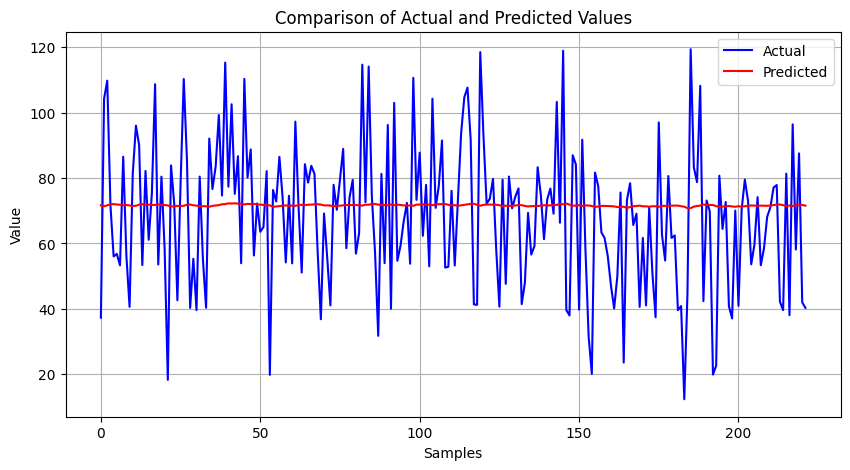

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BILSTM_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BIGRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiGRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiGRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiGRU layer with 50 units, return_sequences=True allows stacking another BiGRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiGRU layer with 50 units
model.add(Bidirectional(GRU(units=50)))  # This is the last BiGRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 24, 400)           279600    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 400)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 24, 200)           301200    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 24, 200)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 24, 100)           75600     
 onal)                                                           
                                                        

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 [==============================] - 5s 99ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.9396
MAE: 17.4983
MAD: 17.5530
MAPE: 35.3950%
R-squared: -0.0119


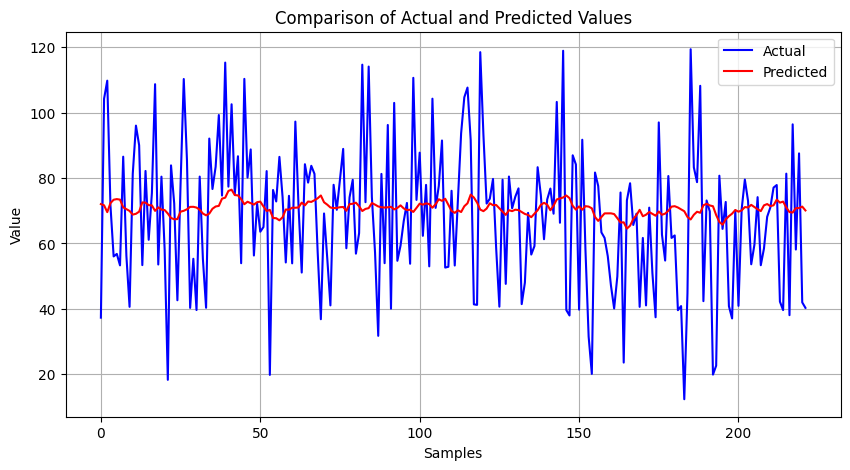

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bigru_units1=200, bigru_units2=100, bigru_units3=50, bigru_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(GRU(units=bigru_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units4)),  # This last GRU layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bigru_units1': [100, 200],
    'model__bigru_units2': [50, 100],
    'model__bigru_units3': [25, 50, 75],
    'model__bigru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  49.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  41.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  44.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  47.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  45.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  49.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  46.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  38.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  48.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  52.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  46.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  56.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  47.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  45.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  48.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  59.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  32.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  34.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  31.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  43.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  36.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  31.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  48.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  39.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  44.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.1, 'model__bigru_units4': 50, 'model__bigru_units3': 25, 'model__bigru_units2': 50, 'model__bigru_units1': 200}
Best score (neg_mean_squared_error): -0.016245954824799586


Best BIGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Create the model with the optimized parameters
model = Sequential([
    Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=25, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50)),
    Dropout(rate=0.1),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Fit the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_124 (Bidirectional)    │ (None, 24, 400)             │         279,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_124 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_125 (Bidirectional)    │ (None, 24, 100)             │         135,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_125 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_126 (Bidirectional)    │ (None, 24, 50)              │          19,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_126 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_127 (Bidirectional)    │ (None, 100)                 │          30,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_127 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,951 (1.77 MB)

 Trainable params: 464,951 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 59s 436ms/step - loss: 0.1383
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 344ms/step - loss: 0.0254
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 0.0211
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0205
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - loss: 0.0205
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0202
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0203
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - loss: 0.0200
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 0.0194
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0195
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - loss: 0.0196
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - loss: 0.0177
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - loss: 0.0205
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0177
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 21

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.8353
MAE: 17.6457
MAD: 17.6187
MAPE: 34.4249%
R-squared: -0.0023


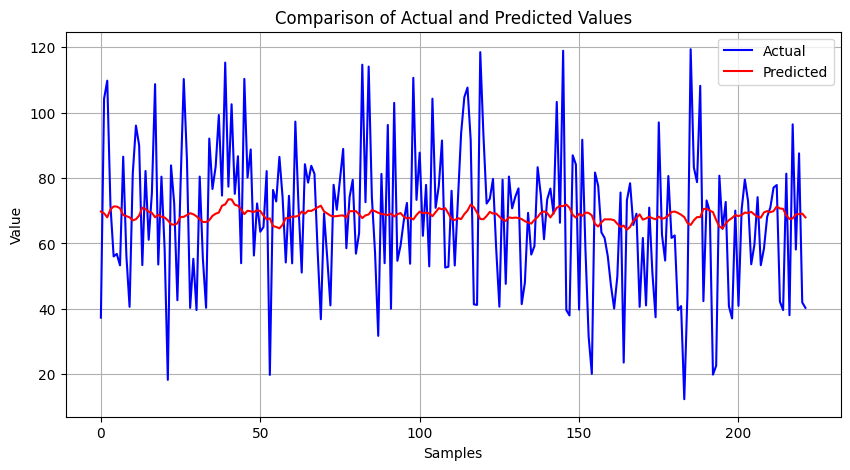

In [ ]:

import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BIGRU_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Adding max pooling to reduce dimensionality
model.add(Dropout(0.1))  # Applying 10% dropout

# Flatten the data for the dense layers
model.add(Flatten())

# Adding a dense layer
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 64)              │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 18, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_131 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,401 (763.29 KB)

 Trainable params: 195,401 (763.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2753
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0269
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0224
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0206
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0213
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0221
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0236
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0206
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0197
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0219
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0219
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0232
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 21.9288
MAE: 17.8051
MAD: 17.9861
MAPE: 33.7540%
R-squared: -0.0109


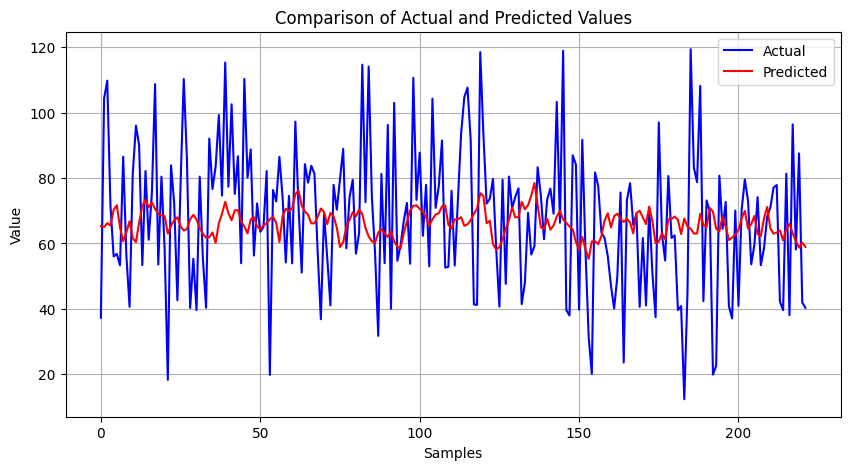

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(filters1=64, filters2=128, kernel_size1=3, kernel_size2=3, dropout_rate=0.1):
    model = Sequential([
        Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(rate=dropout_rate),
        Flatten(),
        Dense(units=100, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__filters1': [32, 64, 128],
    'model__filters2': [64, 128, 256],
    'model__kernel_size1': [3, 5],
    'model__kernel_size2': [3, 5],
    'model__dropout_rate': [0.1, 0.2, 0.3]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.0s
[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Best parameters found:  {'model__kernel_size2': 3, 'model__kernel_size1': 5, 'model__filters2': 128, 'model__filters1': 128, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.01997948334046289


Best CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Constructing the model with the optimal parameters
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(24, 31)),
    Dropout(rate=0.1),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(rate=0.1),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dropout(rate=0.1),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Optionally, train the model with your training data
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_65 (Conv1D)                   │ (None, 20, 128)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_225 (Dropout)                │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_66 (Conv1D)                   │ (None, 18, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_226 (Dropout)                │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_227 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,649 (721.29 KB)

 Trainable params: 184,649 (721.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1875
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0258
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0238
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0239
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0203
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0211
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0198
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0179
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0227
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0190
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0193
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0213
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0185
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0194

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 22.5273
MAE: 18.2384
MAD: 17.9431
MAPE: 34.3870%
R-squared: -0.0669


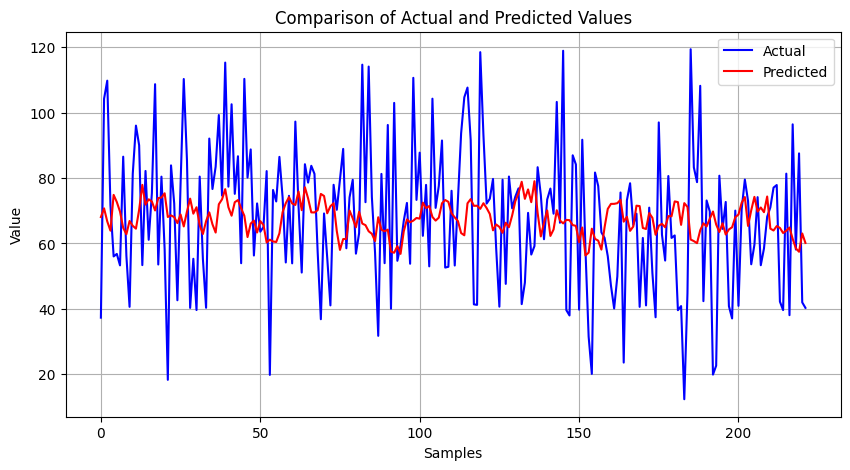

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('CNN_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.models import Model, Sequential

# Assuming X_train is shaped (samples, timesteps, features)
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]
encoding_dim = 32  # Desired dimensionality of encoded representation

# Encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(200, return_sequences=True)(inputs)  # First LSTM layer with 200 units
encoded = Dropout(0.1)(encoded)  # Dropout rate of 0.1
encoded = LSTM(100, return_sequences=False)(encoded)  # Second LSTM layer with 100 units
encoded = Dropout(0.1)(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)  # Encoder output

# Decoder
decoded = RepeatVector(timesteps)(encoder_output)
decoded = LSTM(100, return_sequences=True)(decoded)  # First LSTM layer in decoder
decoded = Dropout(0.1)(decoded)
decoded = LSTM(200, return_sequences=True)(decoded)  # Second LSTM layer in decoder, mirroring the encoder
decoded = Dropout(0.1)(decoded)
decoder_output = TimeDistributed(Dense(input_dim))(decoded)

# Create and compile the autoencoder model
autoencoder = Model(inputs, decoder_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=2, batch_size=32)

# Extract encoded features using the encoder part of the autoencoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)
encoded_X_train = encoder_model.predict(X_train)

# LSTM model setup
lstm_model = Sequential([
    LSTM(200, return_sequences=True, input_shape=(timesteps, encoding_dim)),  # First LSTM layer
    Dropout(0.1),
    LSTM(100, return_sequences=True),  # Second LSTM layer
    Dropout(0.1),
    LSTM(50, return_sequences=True),  # Third LSTM layer
    Dropout(0.1),
    LSTM(25, return_sequences=False),  # Fourth LSTM layer, not returning sequences for final output
    Dropout(0.1),
    Dense(1)
])

# Compile and train the LSTM model on the encoded features
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()  # Summarize the model structure

# Train the LSTM model
lstm_model.fit(encoded_X_train, y_train, epochs=2, batch_size=32)


Epoch 1/2
30/30 [==============================] - 33s 287ms/step - loss: 0.1005
Epoch 2/2
30/30 [==============================] - 4s 43ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 200)           186400    
                                                                 
 dropout_4 (Dropout)         (None, 24, 200)           0         
                                                                 
 lstm_5 (LSTM)               (None, 24, 100)           120400    
                                                                 
 dropout_5 (Dropout)         (None, 24, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 24, 50)            30200     
                                                                 
 dropout_6 (Dropout)         (None, 24, 50)

7/7 [==============================] - 3s 54ms/step
RMSE: 22.3913
MAE: 18.2574
MAD: 18.2574
MAPE: 32.5959%
R-squared: -0.0540


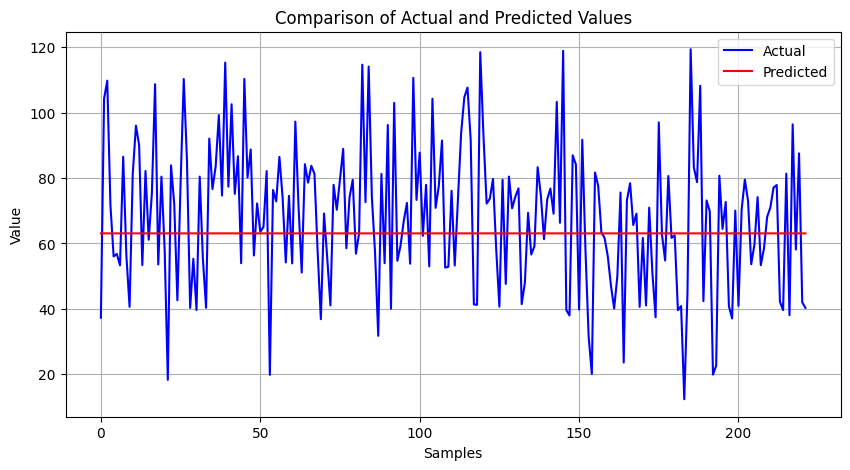

Results saved to Excel successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming sc is an already fitted MinMaxScaler instance
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
lag = 24  # Number of time steps to use as input
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Assuming autoencoder and bigru_model are already trained and encoder_model is defined as before
# Transform the test set using the encoder part of the autoencoder
encoded_X_test = encoder_model.predict(X_test)

# Make predictions using the BiGRU model on the encoded test set
y_pred = lstm_model.predict(encoded_X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Apply inverse transform to predictions
# Apply inverse transform to predictions
pred_full = np.zeros((y_pred_reshaped.shape[0], test_features_scaled.shape[1]))  # Correct dimension
pred_full[:, 0] = y_pred_reshaped.ravel()  # Assuming the target is the first column
y_pred_inverse_full = sc.inverse_transform(pred_full)  # Apply inverse transform
y_pred_inverse = y_pred_inverse_full[:, 0]

# Compare against actual values
real_y = test_df['Y'].values[-len(y_pred):]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))
mae = mean_absolute_error(real_y, y_pred_inverse)
mad = np.mean(np.abs(real_y - y_pred_inverse))
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y,  # No need to flatten if it's already a 1D array
    'Predicted': y_pred_inverse.flatten()  # Flattening to ensure it's a 1D array
})

# Write the DataFrame to an Excel file
results_df.to_excel('LSTM_Autoencoder_Results_DS3.xlsx', index=False)
print("Results saved to Excel successfully.")


# **Baysian optimization**

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.9 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel, RandomSearch

class LSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(LSTM(
            units=hp.Int('units1', min_value=100, max_value=300, step=50),
            return_sequences=True,
            input_shape=self.input_shape
        ))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.3, step=0.05)))

        model.add(LSTM(
            units=hp.Int('units2', min_value=50, max_value=150, step=50),
            return_sequences=True
        ))
        model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.3, step=0.05)))

        model.add(LSTM(
            units=hp.Int('units3', min_value=25, max_value=75, step=25),
            return_sequences=False
        ))
        model.add(Dropout(rate=hp.Float('dropout3', min_value=0.1, max_value=0.3, step=0.05)))

        model.add(Dense(1, activation='linear'))  # Change activation based on your needs, e.g., sigmoid for binary classification

        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )
        return model

# Assuming you have prepared your data and determined the input shape
input_shape = X_train.shape[1:]  # e.g., (timesteps, features)

# Initialize the hypermodel
hypermodel = LSTMHyperModel(input_shape=input_shape)

# Set up the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=2,
    directory='test_tuner',
    project_name='lstm_tuning'
)

# Start tuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best LSTM Configuration: {best_hps.values}")

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)




Trial 5 Complete [00h 02m 21s]
val_mean_squared_error: 0.01605582982301712

Best val_mean_squared_error So Far: 0.015860293991863728
Total elapsed time: 00h 10m 13s
Best LSTM Configuration: {'units1': 200, 'dropout1': 0.25, 'units2': 150, 'dropout2': 0.1, 'units3': 50, 'dropout3': 0.1, 'learning_rate': 0.000907315567349758}
Epoch 1/5
24/24 [==============================] - 11s 185ms/step - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 2/5
24/24 [==============================] - 4s 188ms/step - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 3/5
24/24 [==============================] - 3s 130ms/step - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 4/5
24/24 [==============================] - 3s 133ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 5/5
24/24 [============

7/7 [==============================] - 2s 40ms/step
RMSE: 22.3351
MAE: 17.5086
MAD: 17.7667
MAPE: 37.0876%
R-squared: -0.0488


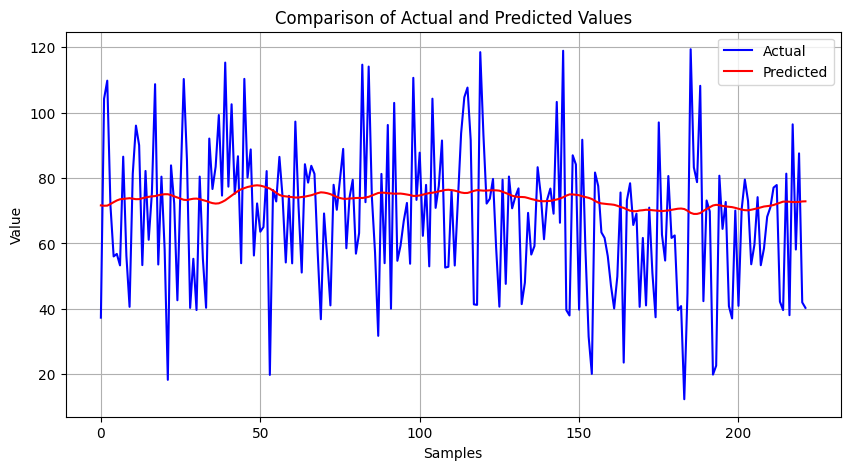

Data has been written to Excel successfully.


In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = best_model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure  is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure  does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))


import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('LSTM_Baysian_Results_DS3.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")
